In [1]:
import sqlite3
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import moyal
from collections import Counter
from utils import *
from plotting_tools import *
import os
#%matplotlib qt5
mpl.rc("figure", dpi=300)
plt.rcParams["font.size"] =   20.0
colors = ['#0088EE', '#66CC00', '#6600CC', '#CC6600', '#00CCCC', '#CC0000', '#CC00CC', '#FFEE00', '#00CC00', '#0000CC', '#00CC66', '#CC0066', '#A3FF47', '#850AFF', '#85FF0A', '#A347FF']

In [2]:
db_file = '../data_20250213_173104_newSiPM_synthetic.dat'
conn = connect_to_db(db_file)
df_pedestal = create_df(conn)
adc_split_array_pedestal = get_adc_split_array(df_pedestal, False, False, True, 64)

[1.16e+03, 1.15e+03, 1.13e+03, 958, 918, ..., 1.15e+03, 1.13e+03, 902, 921]
0 205.4667333334236
0 1 1
[1.19e+03, 1.17e+03, 1.39e+03, 1.18e+03, ..., 1.15e+03, 1.52e+03, 1.17e+03]
1 194.20655678777106
1 2 2
[1.11e+03, 1.11e+03, 1.1e+03, 1.14e+03, ..., 1.09e+03, 1.08e+03, 1.09e+03]
2 200.1813163924112
2 3 3
[1.19e+03, 1.17e+03, 1.18e+03, 1.38e+03, ..., 1.18e+03, 1.14e+03, 1.17e+03]
3 196.09758477822962
3 4 4
[1.14e+03, 1.13e+03, 1.15e+03, 1.32e+03, ..., 1.11e+03, 1.09e+03, 1.12e+03]
4 198.81217530933264
4 5 5
[1.18e+03, 1.17e+03, 1.17e+03, 1.17e+03, ..., 1.17e+03, 1.15e+03, 1.52e+03]
5 195.37731838102746
5 6 6
[1.13e+03, 1.52e+03, 1.13e+03, 1.14e+03, ..., 1.25e+03, 1.1e+03, 1.28e+03]
6 195.70250405271108
6 7 7
[976, 977, 1.03e+03, 1.17e+03, 952, 980, ..., 980, 1.37e+03, 967, 942, 1.17e+03]
7 203.15446440494676
7 8 8
[868, 868, 871, 1.06e+03, 859, 871, 856, ..., 849, 843, 871, 862, 846, 831, 856]
8 196.95907085778697
8 9 9
[1.3e+03, 1.5e+03, 1.1e+03, 1.1e+03, ..., 1.09e+03, 1.07e+03, 1.08e

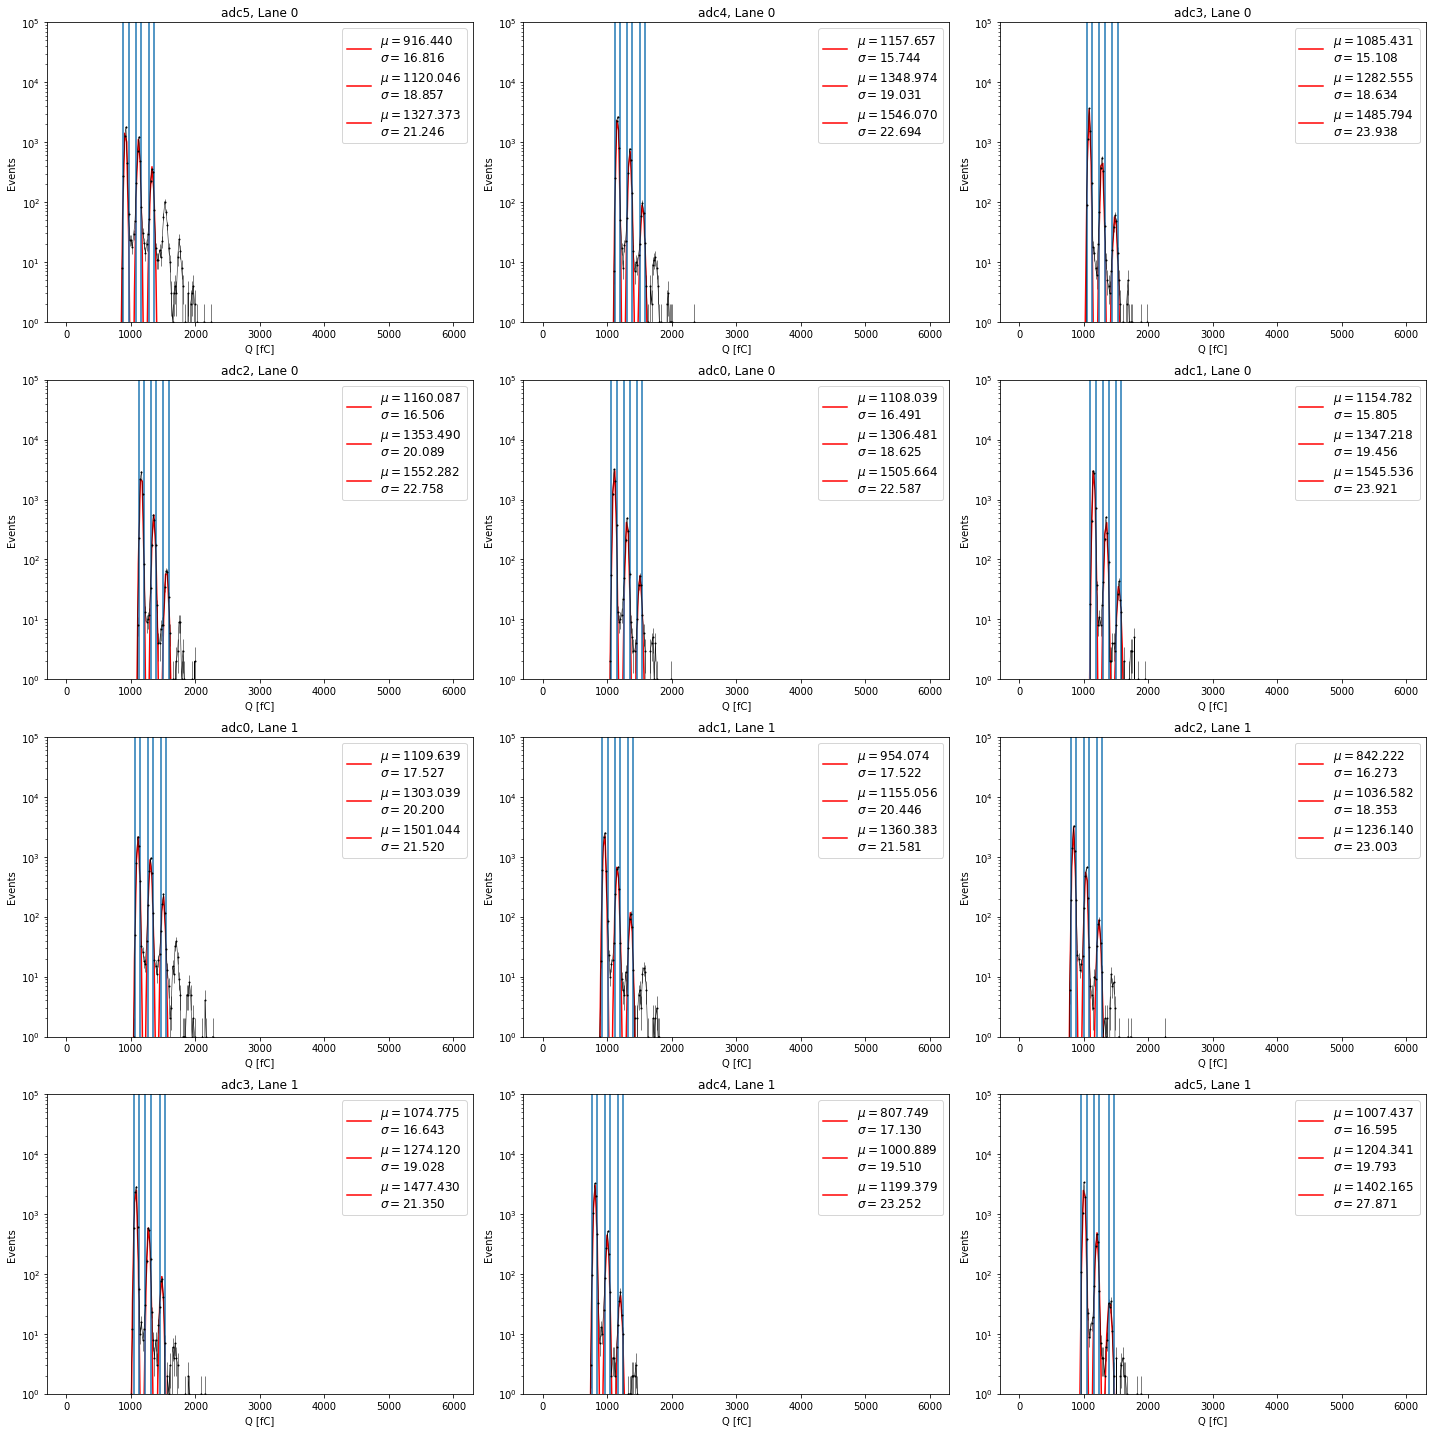

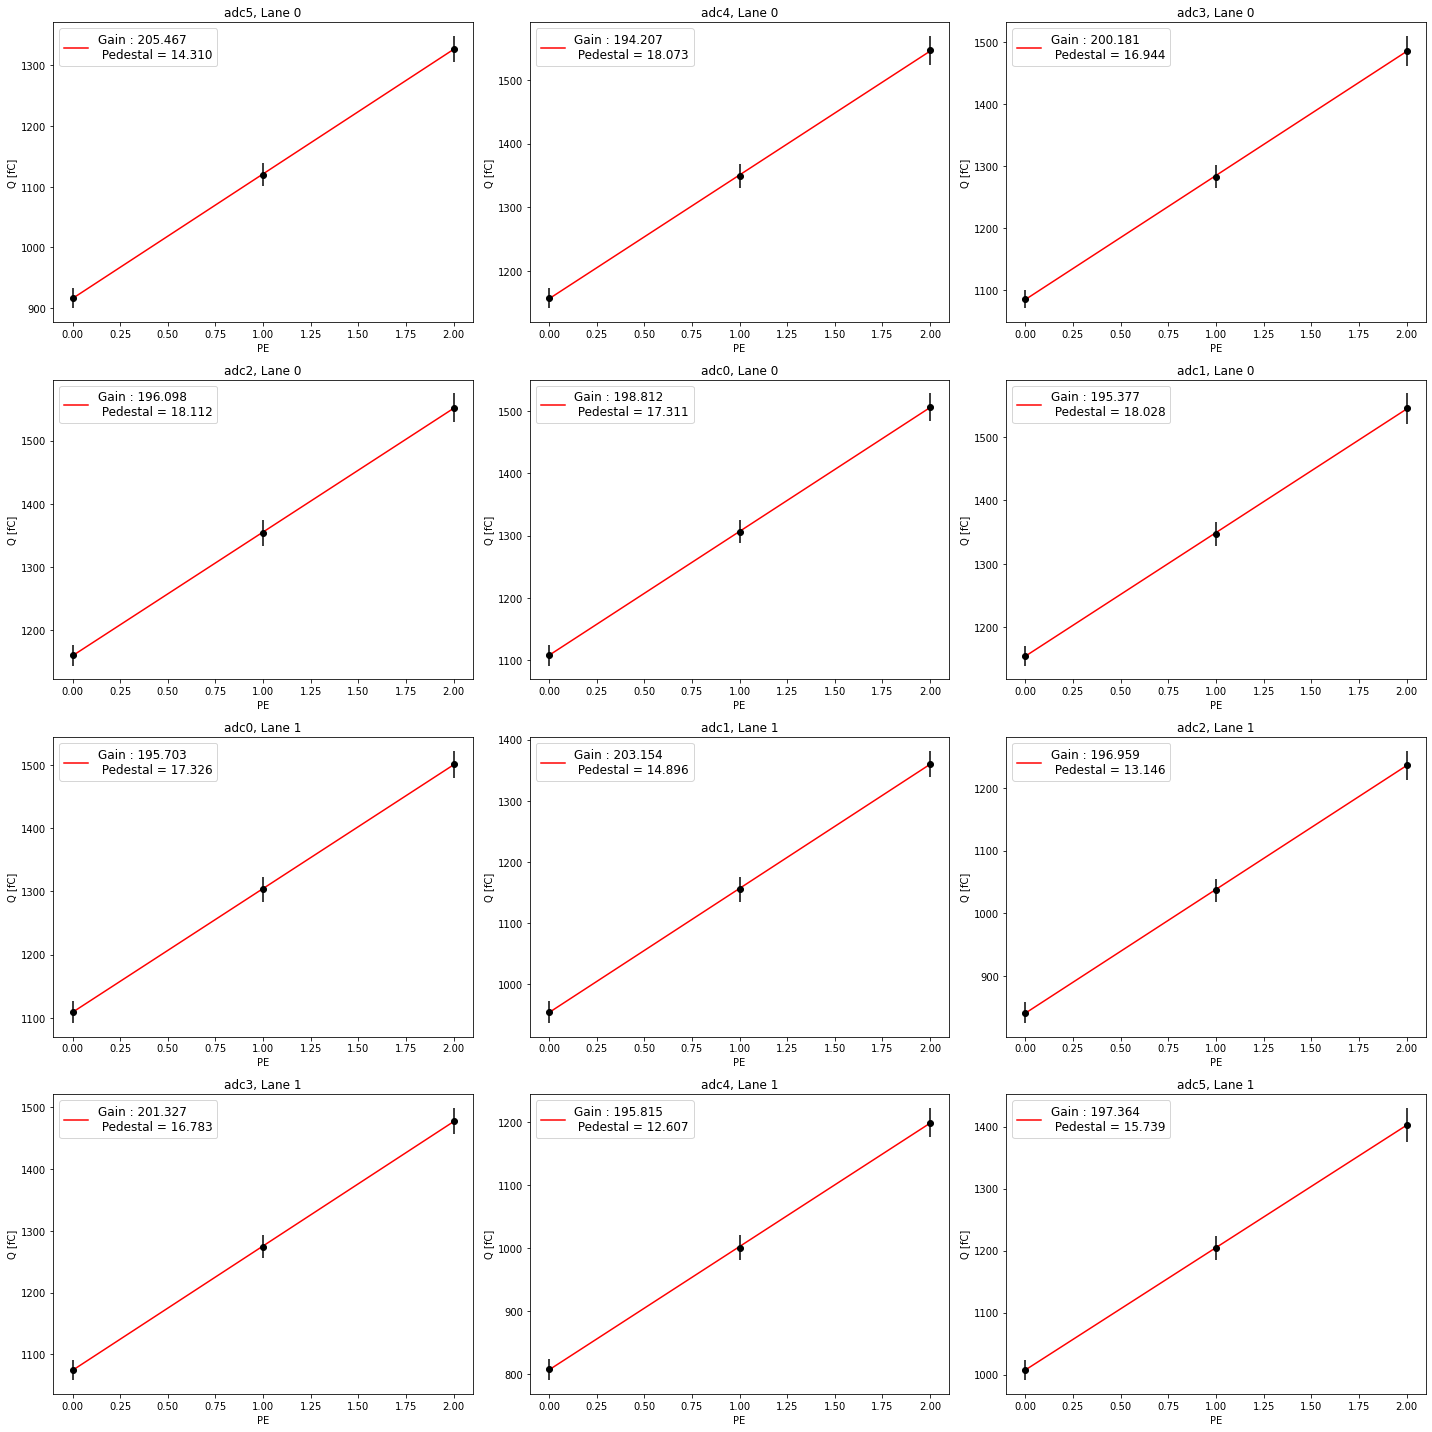

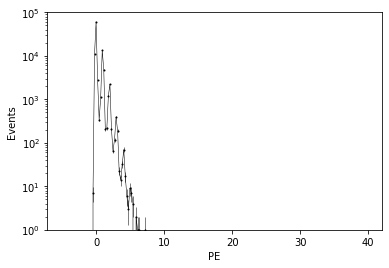

In [3]:
gain_list, pedestal_list = get_gain(adc_split_array_pedestal, get_gain=True, eight_channel=False, nsamples=64, new_format=True, by_bunch_count=False, gain_list = None, pedestal_list = None, n_peaks=3)

In [4]:
db_files_external_trigger_test = ['../data_20250215_114611_ext_or_thresh_trig.dat', '../data_20250216_102243_ext_or_thresh_trig.dat']
#data_20250213_173658_ext_trig_new_SiPM_52V
conns_external_trigger_test = []
for file in db_files_external_trigger_test:
    conns_external_trigger_test.append(connect_to_db(file))
df_full_conns_external_trigger_test = create_df_combo(conns_external_trigger_test)
df_trigger_full_conns_external_trigger_test = create_trigger_df_combo(conns_external_trigger_test)

In [5]:
adc_split_array_threshold, adc_split_array_cosmics, adc_split_array_both = get_adc_split_array_sort_triggers(df_full_conns_external_trigger_test,df_trigger_full_conns_external_trigger_test, False, True, 64)

In [6]:
import pickle

with open('adc_split_array_threshold.pkl', 'wb') as file:
    pickle.dump(adc_split_array_threshold, file)

with open('adc_split_array_cosmics.pkl', 'wb') as file:
    pickle.dump(adc_split_array_cosmics, file)

with open('adc_split_array_cosmic_and_threshold.pkl', 'wb') as file:
    pickle.dump(adc_split_array_both, file)

0
1
2
3
4
5
6
7
8
9
10
11
18616
18616
18616
18616
18616
18616
18616
18616
18616
18616
18616
18616
0
1
2
3
4
5
6
7
8
9
10
11
24383
24383
24383
24383
24383
24383
24383
24383
24383
24383
24383
24383
0
1
2
3
4
5
6
7
8
9
10
11
368
368
368
368
368
368
368
368
368
368
368
368


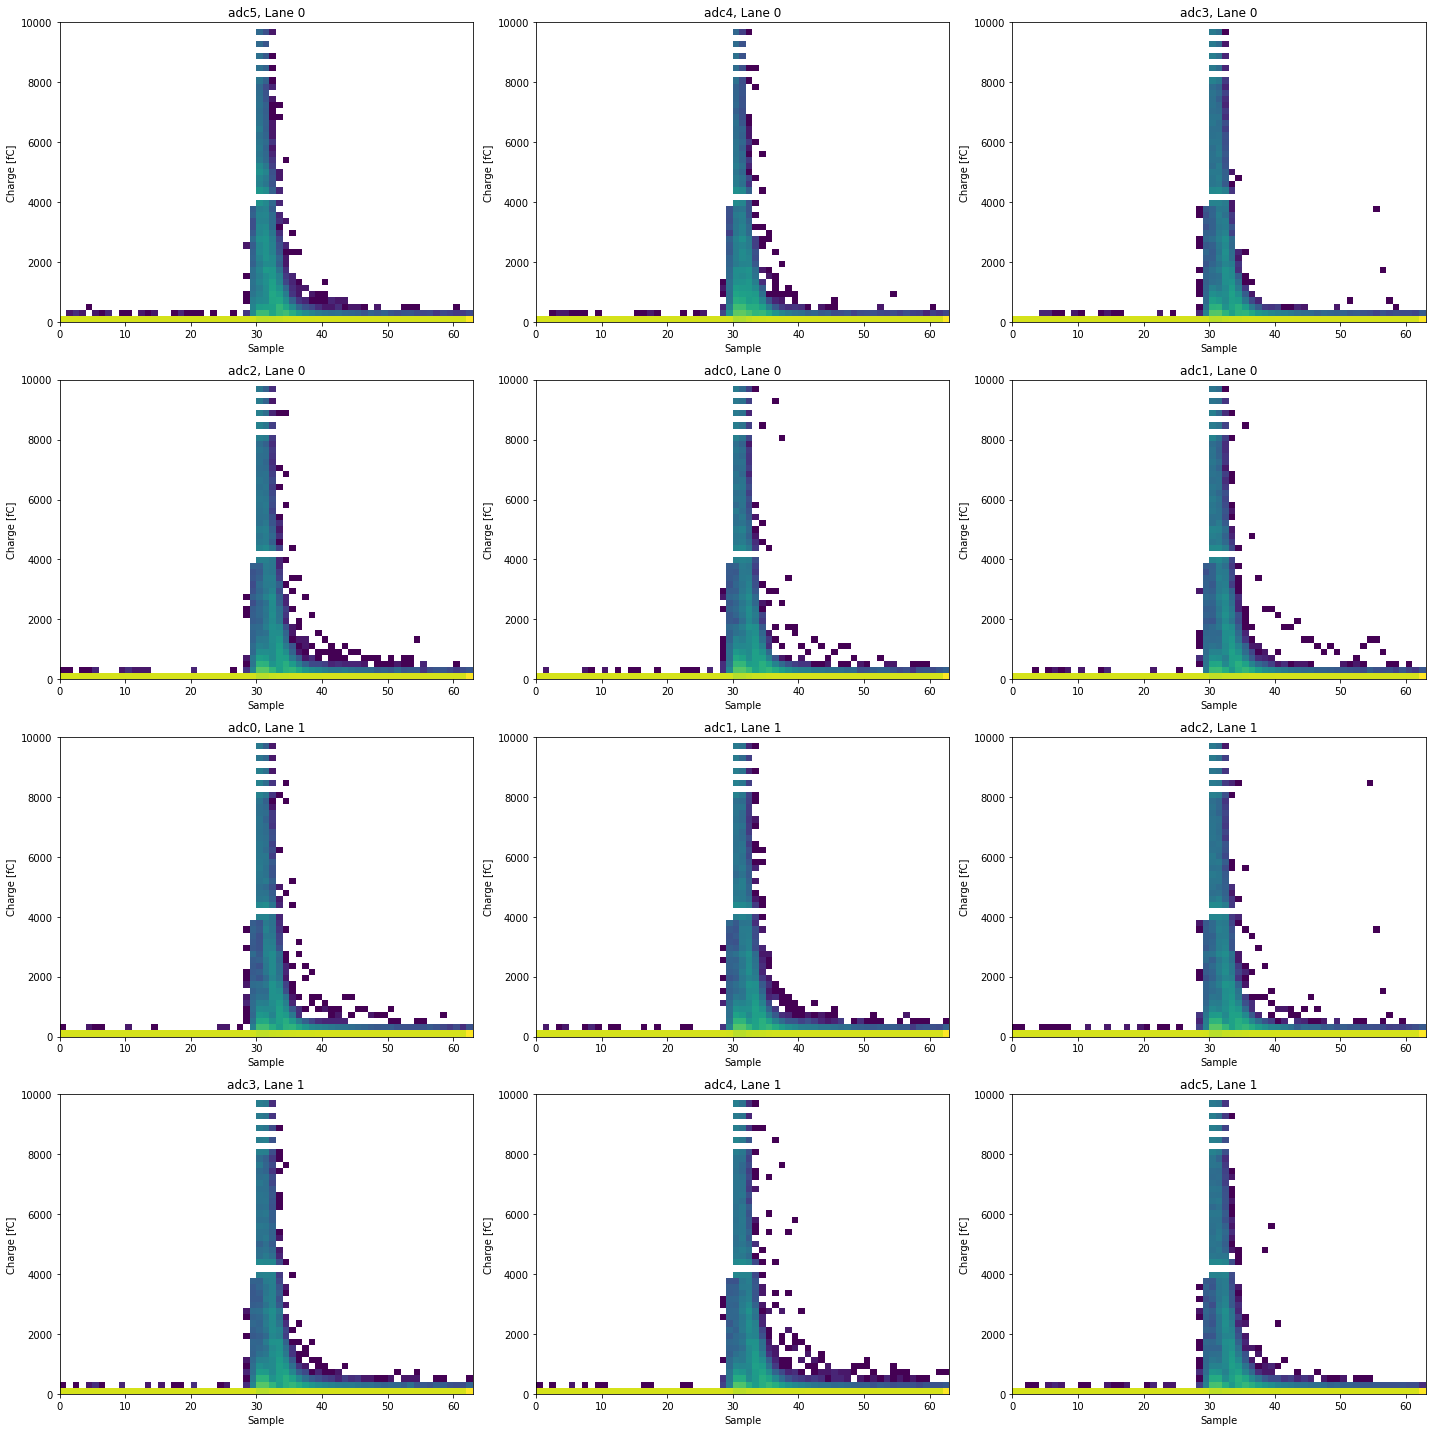

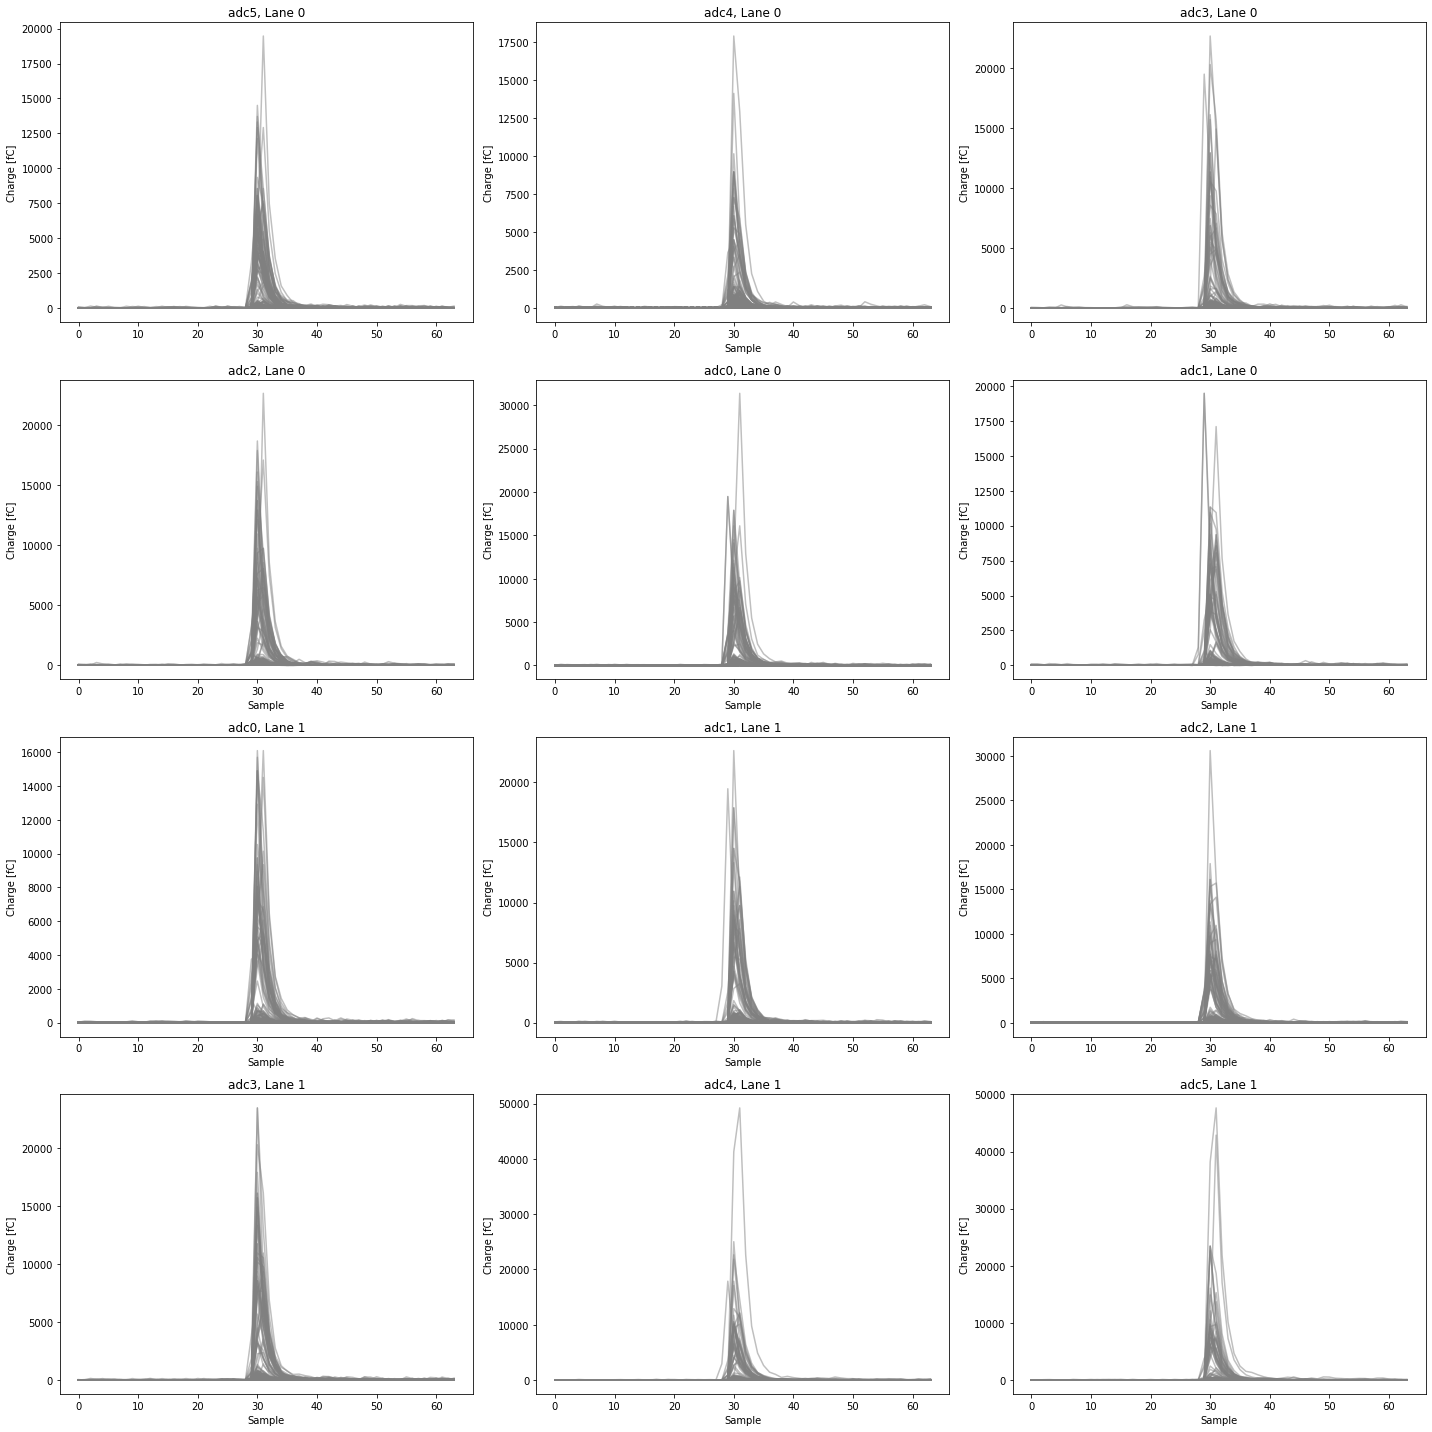

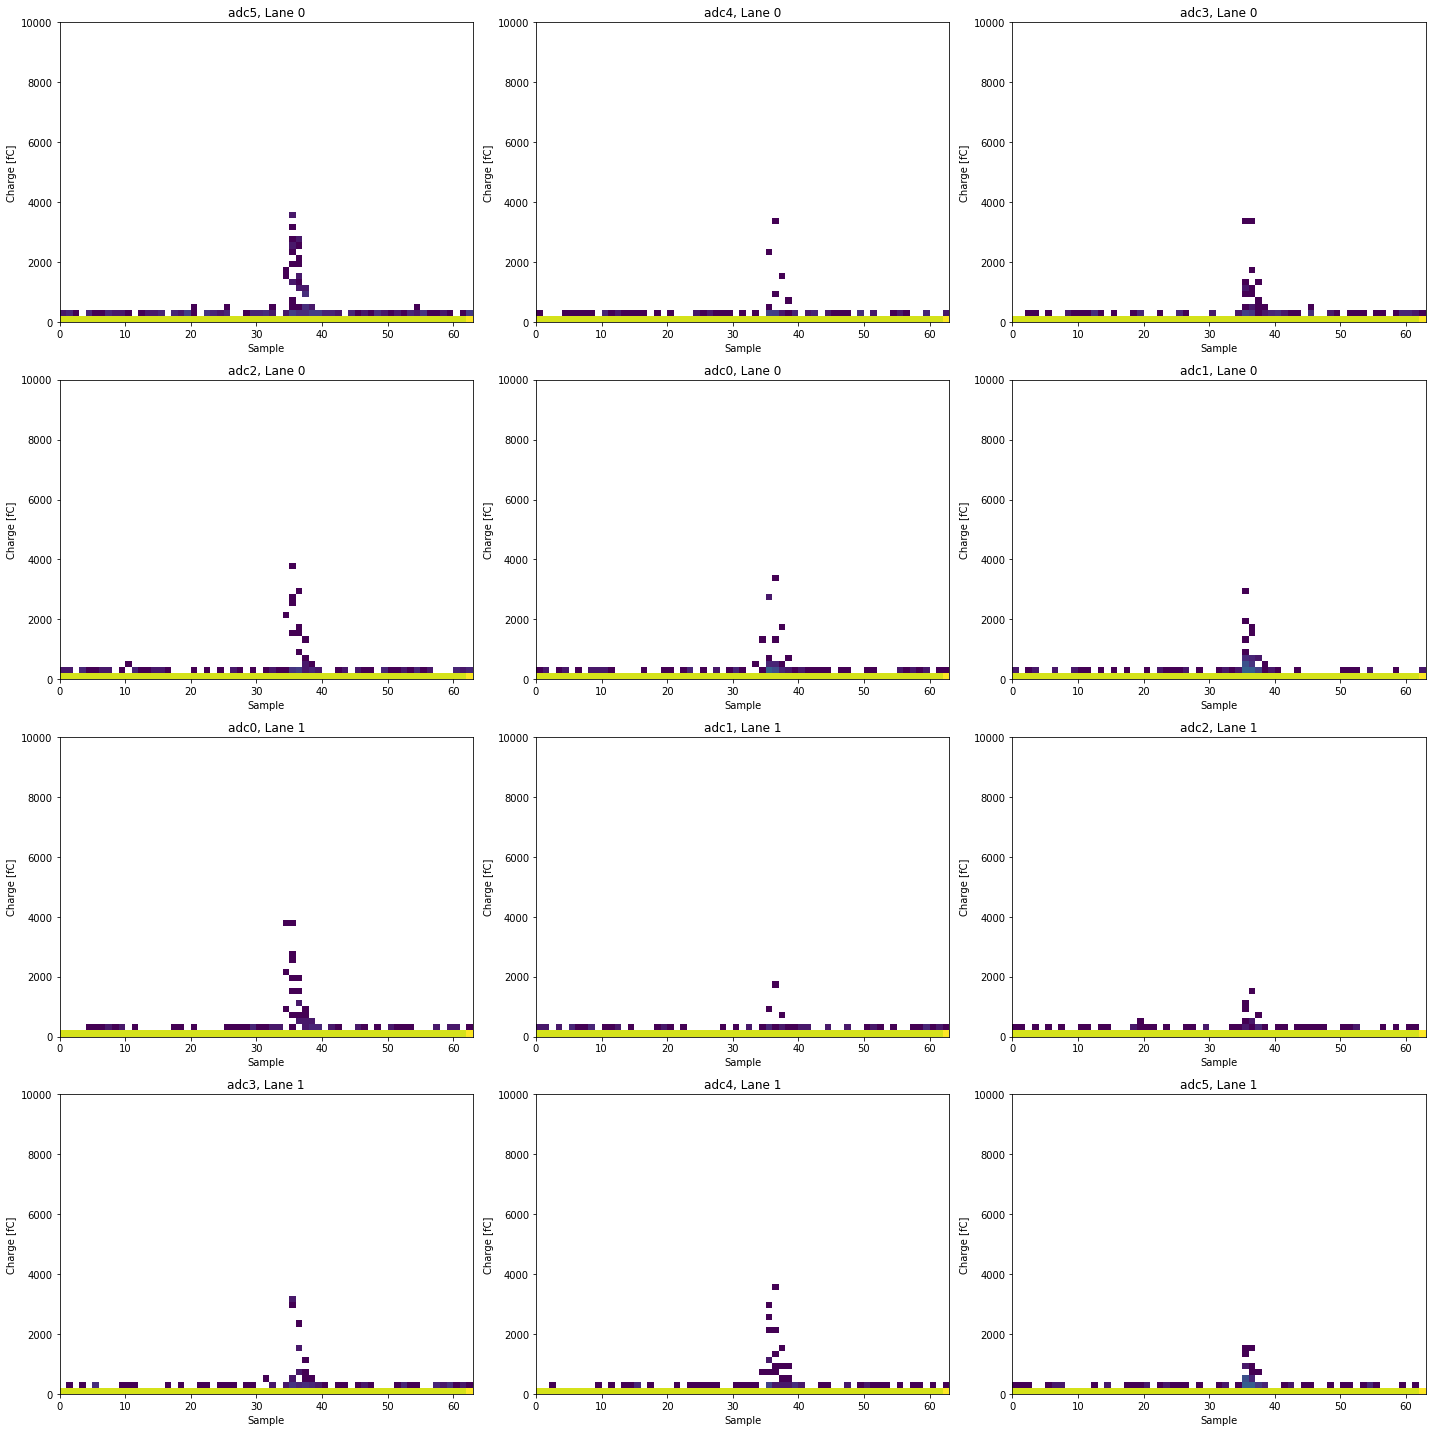

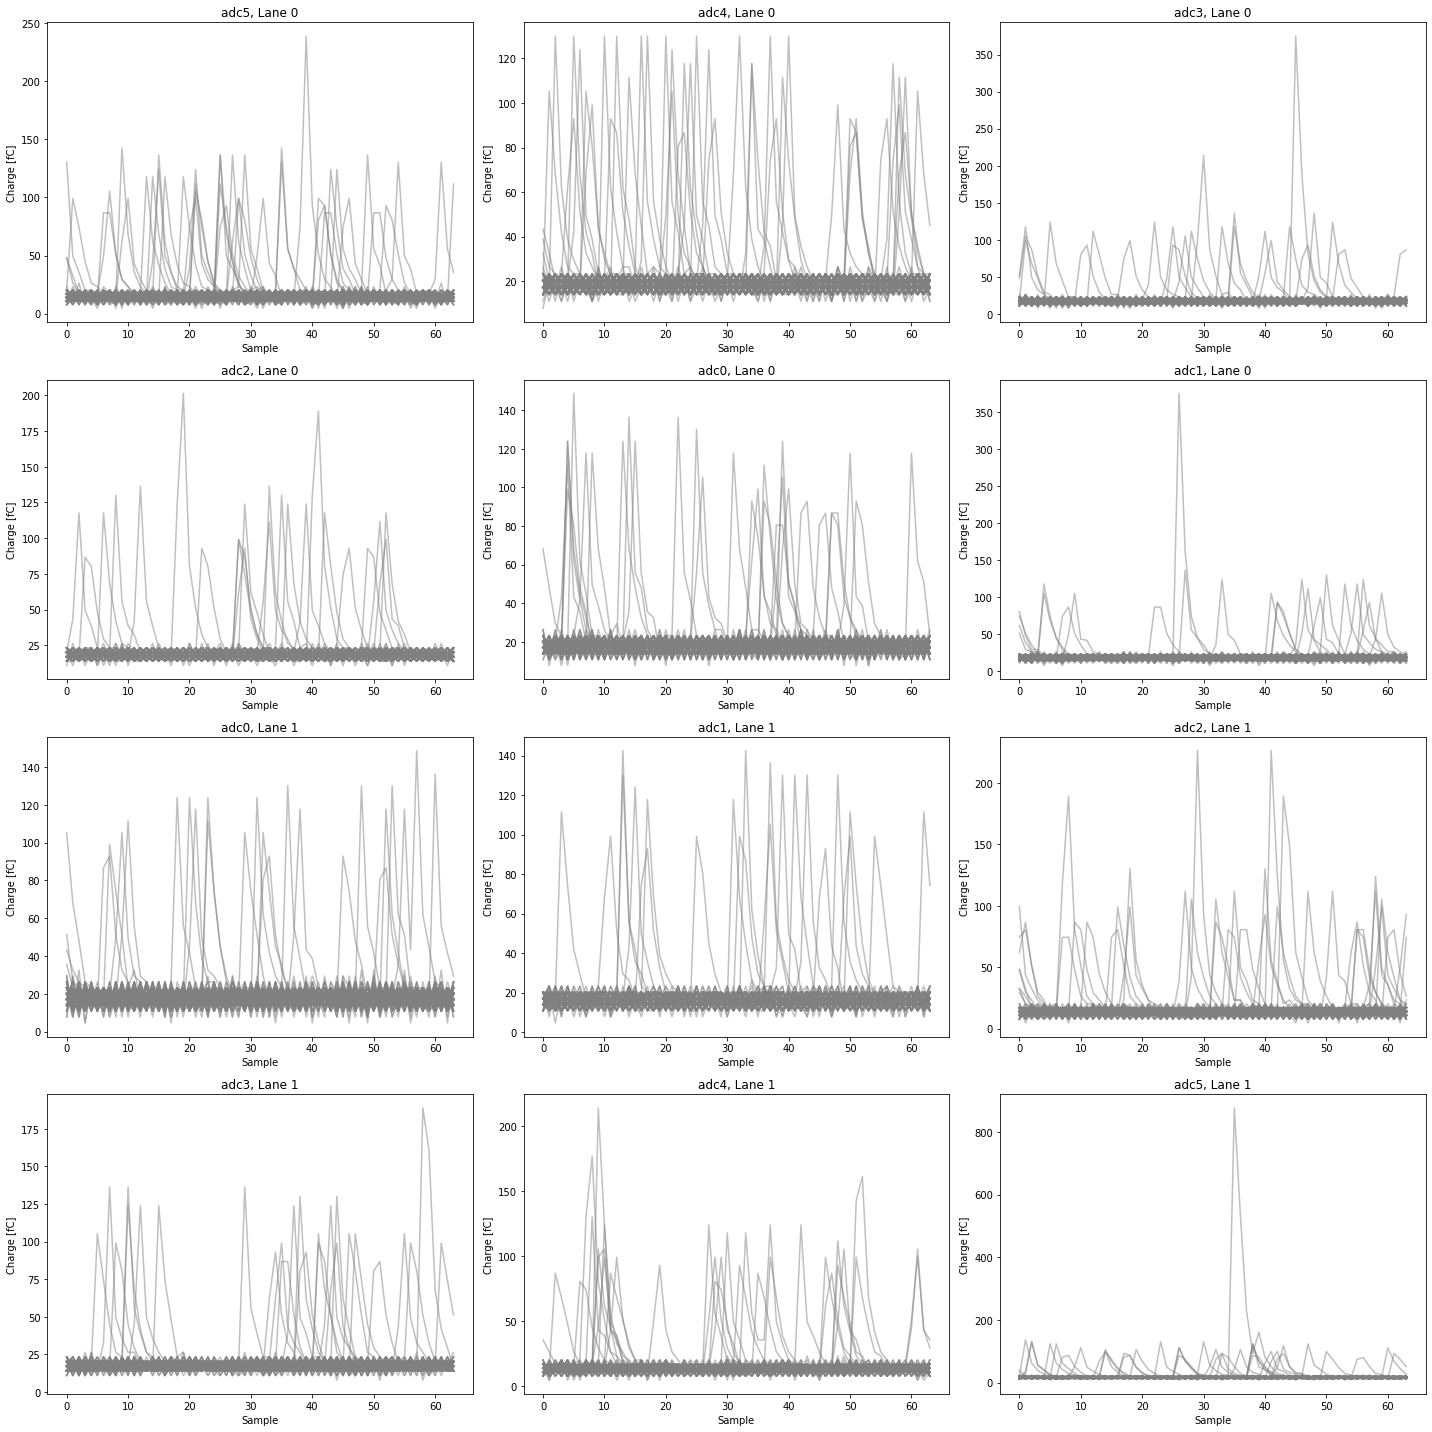

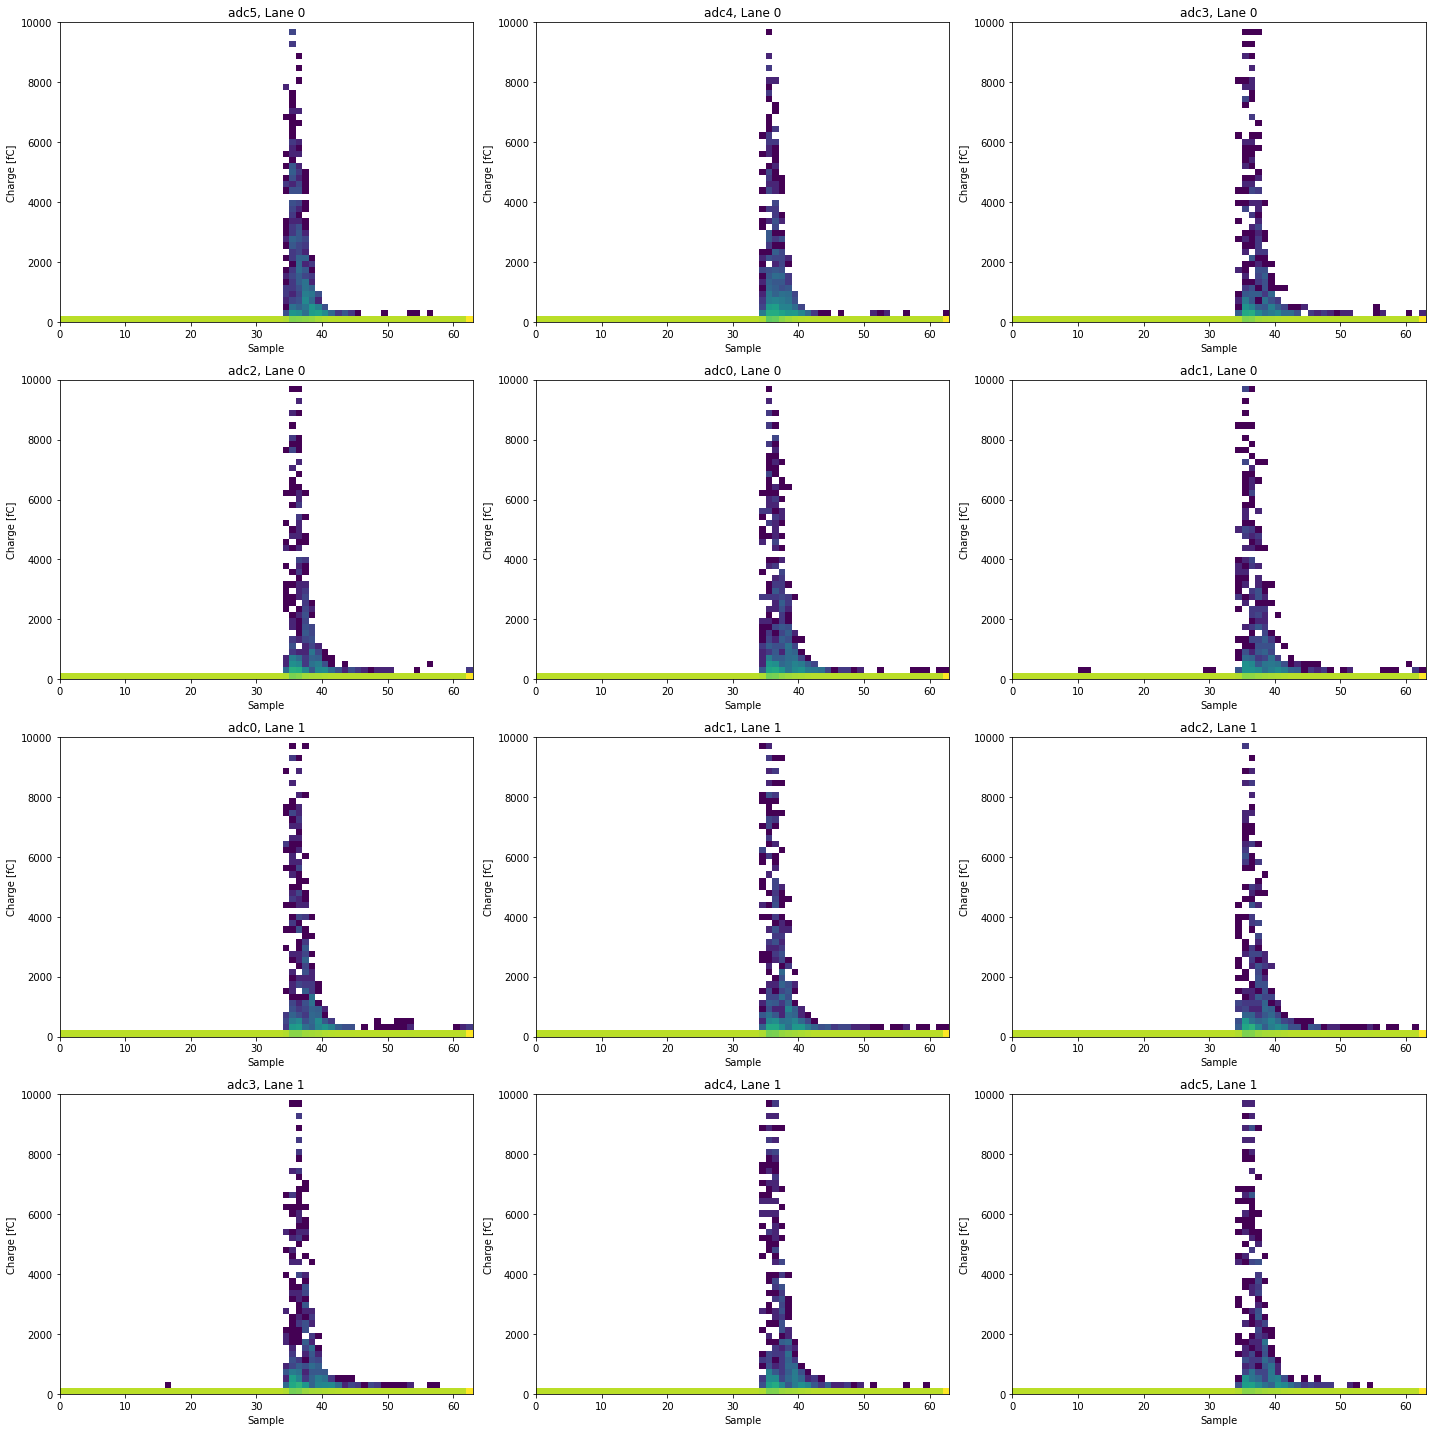

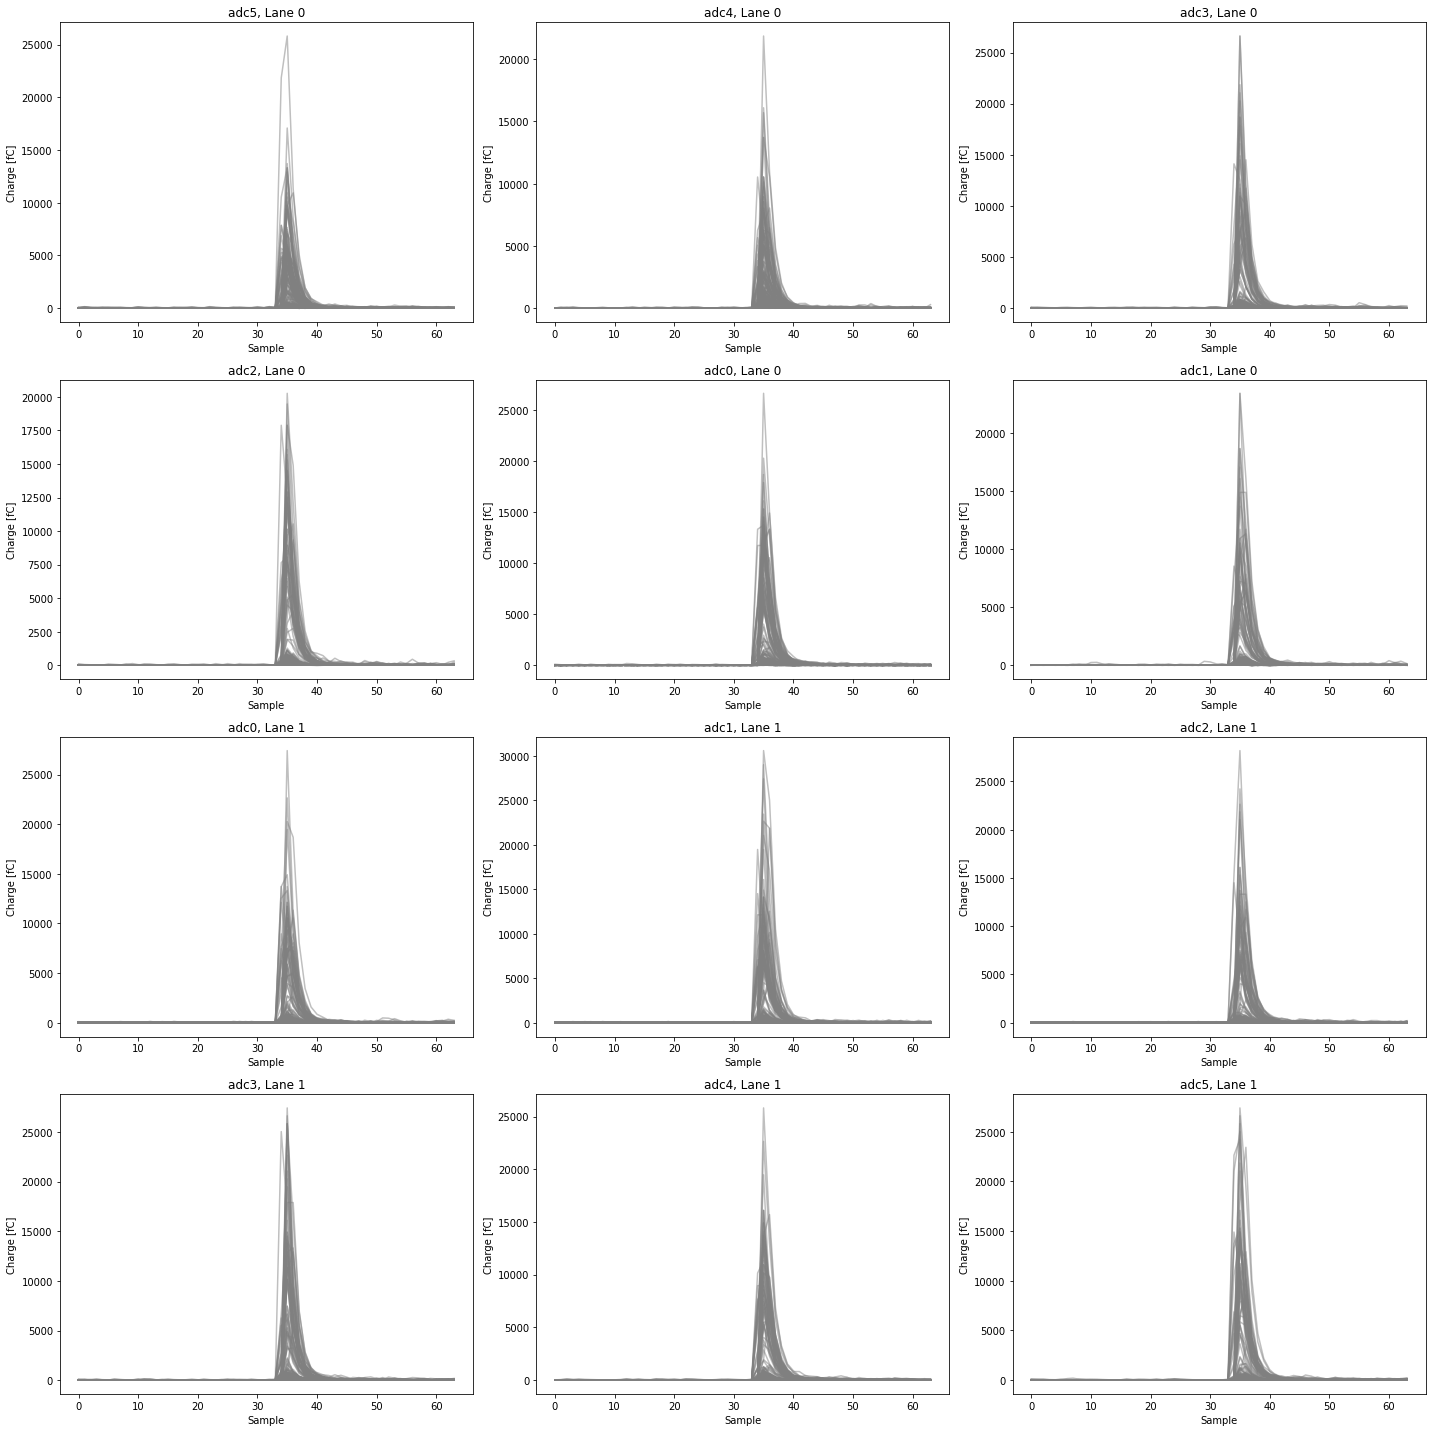

In [7]:
plot_charge_v_samples(adc_split_array_threshold, threshold = 0, eight_channel=False, new_format=True, nsamples=64, by_bunch_count=False, trig_samp = 0, ror_length=64)
plot_charge_v_samples(adc_split_array_cosmics, threshold = 0, eight_channel=False, new_format=True, nsamples=64, by_bunch_count=False, trig_samp = 0, ror_length=64)
plot_charge_v_samples(adc_split_array_both, threshold = 0, eight_channel=False, new_format=True, nsamples=64, by_bunch_count=False, trig_samp = 0, ror_length=64)


[1.04, 0.0166, 3.21, 0.0468, -0.0287, ..., 0.0468, 0.981, 0.0317, 2.09, 0.0015]
[0.0279, 0.0119, 2.02, 6.29, -0.00403, ..., 0.0279, 0.0279, 3.16, 10.1, 3.31]
[1.03, 0.0907, 0.0752, 1.08, 2.17, ..., 0.0287, 0.0752, 4.22, 3.36, -0.0177]
[0.0543, 0.0543, 0.0701, 4.88, 2.1, 61.6, ..., 0.946, 0.0543, 14.5, 119, 8.38]
[3.27, 3.18, 0.0295, 110, 53.6, 3.19, ..., 0.0139, 1.06, 4.22, 187, 26.4, 101]
[46.6, 0.0494, 0.0652, 15.1, 5.19, 2.12, ..., 0.928, 0.0494, 8.44, 0.96, 22.1]
[0.0598, 0.0598, 89.8, -0.0774, 0.0598, ..., 5, 0.0915, 0.0439, 0.139, 3.2]
[0.174, 1.1, 1.13, 0.112, 0.143, 0.158, ..., 2.22, 0.204, 1.07, 0.189, 4.31]
[0.0548, 1.97, 0.0548, 0.0391, 0.0391, ..., 1.05, 4.22, 0.0863, 2.98, 5.26]
[0.0332, 2.07, 1.08, 0.74, 0.0793, 0.0178, ..., 4.2, 3.05, 0.0332, 0.0793, 48.4]
[0.0765, 111, 1.09, 4.13, 1.01, 0.0923, ..., 61, 113, 150, 2.1, 0.985, 68.9]
[1.08, 1.15, 0.119, 22.6, 4.31, 0.135, ..., 1, 2.18, 9.71, 3.21, 0.119, 5.62]
[0.0317, 0.0769, 0.0166, 0.0015, 0.0468, ..., 0.0166, 0.0166, 0

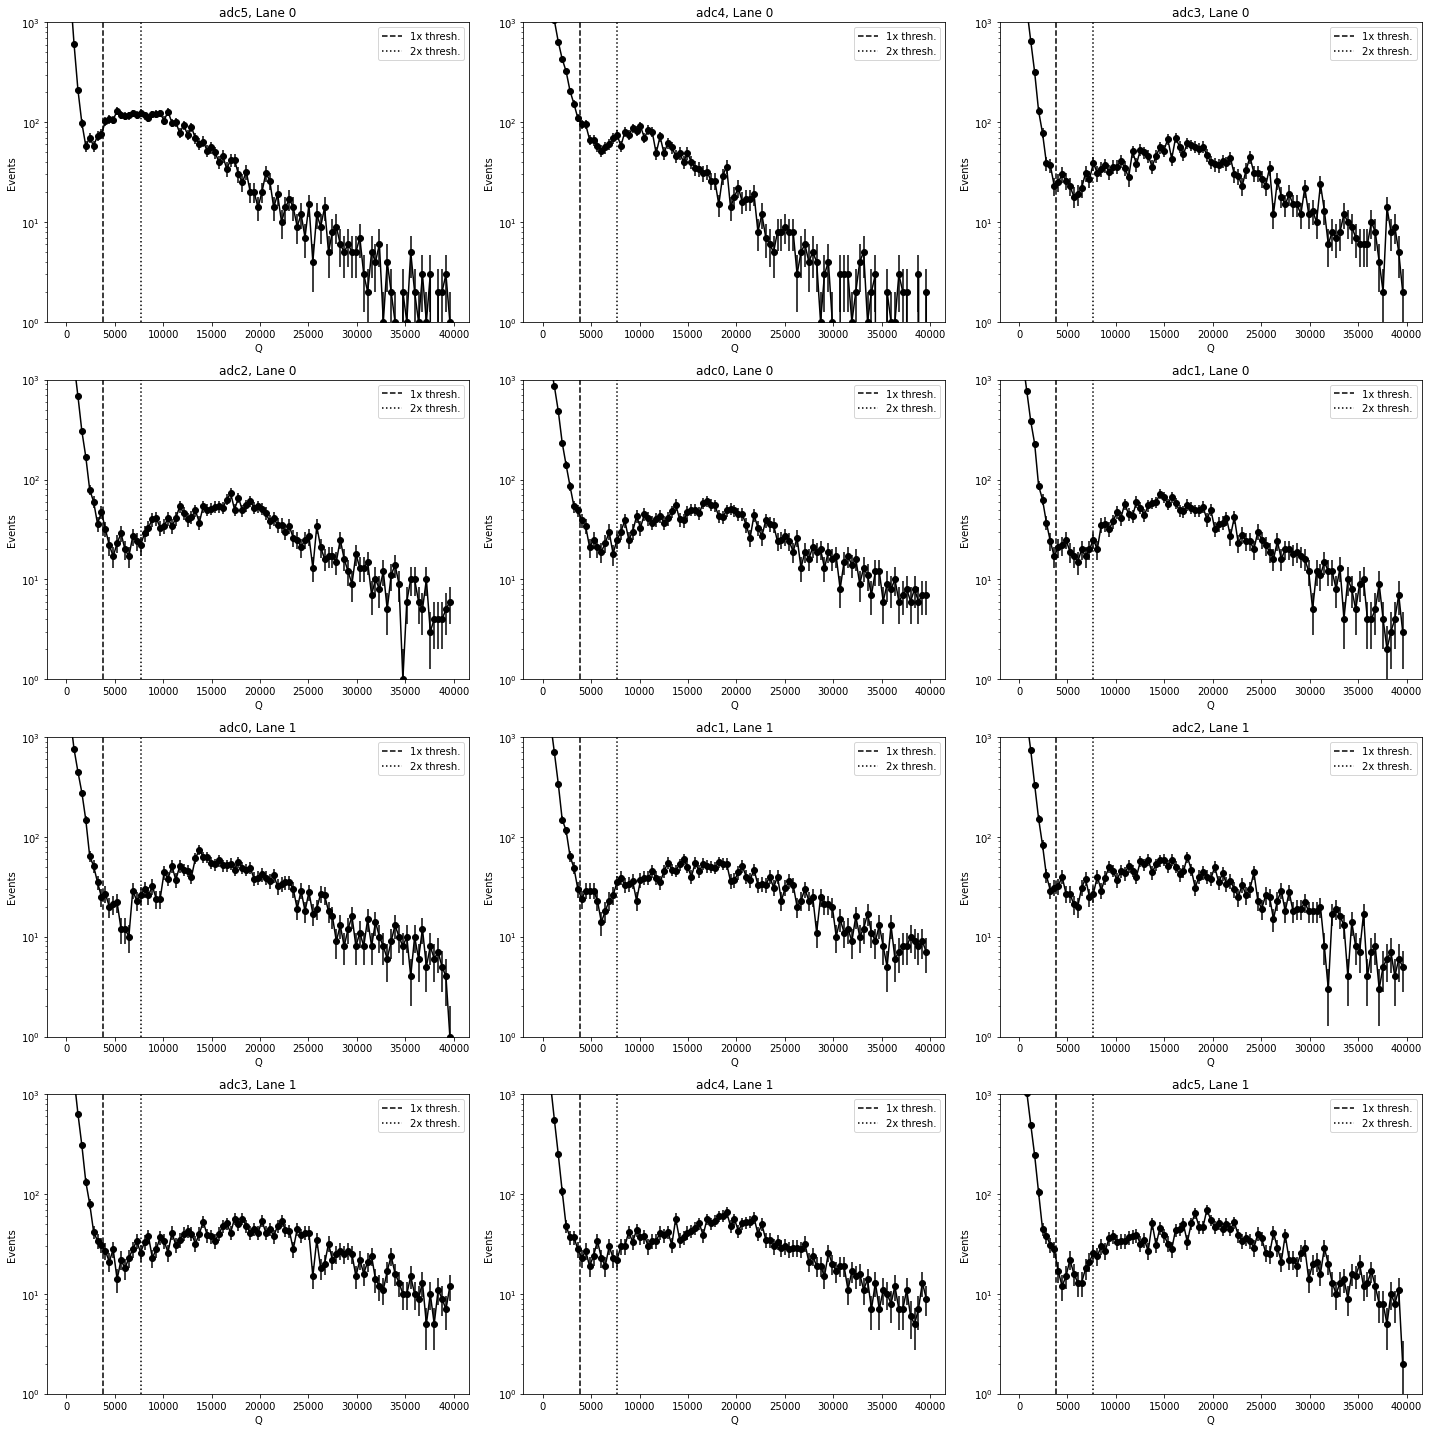

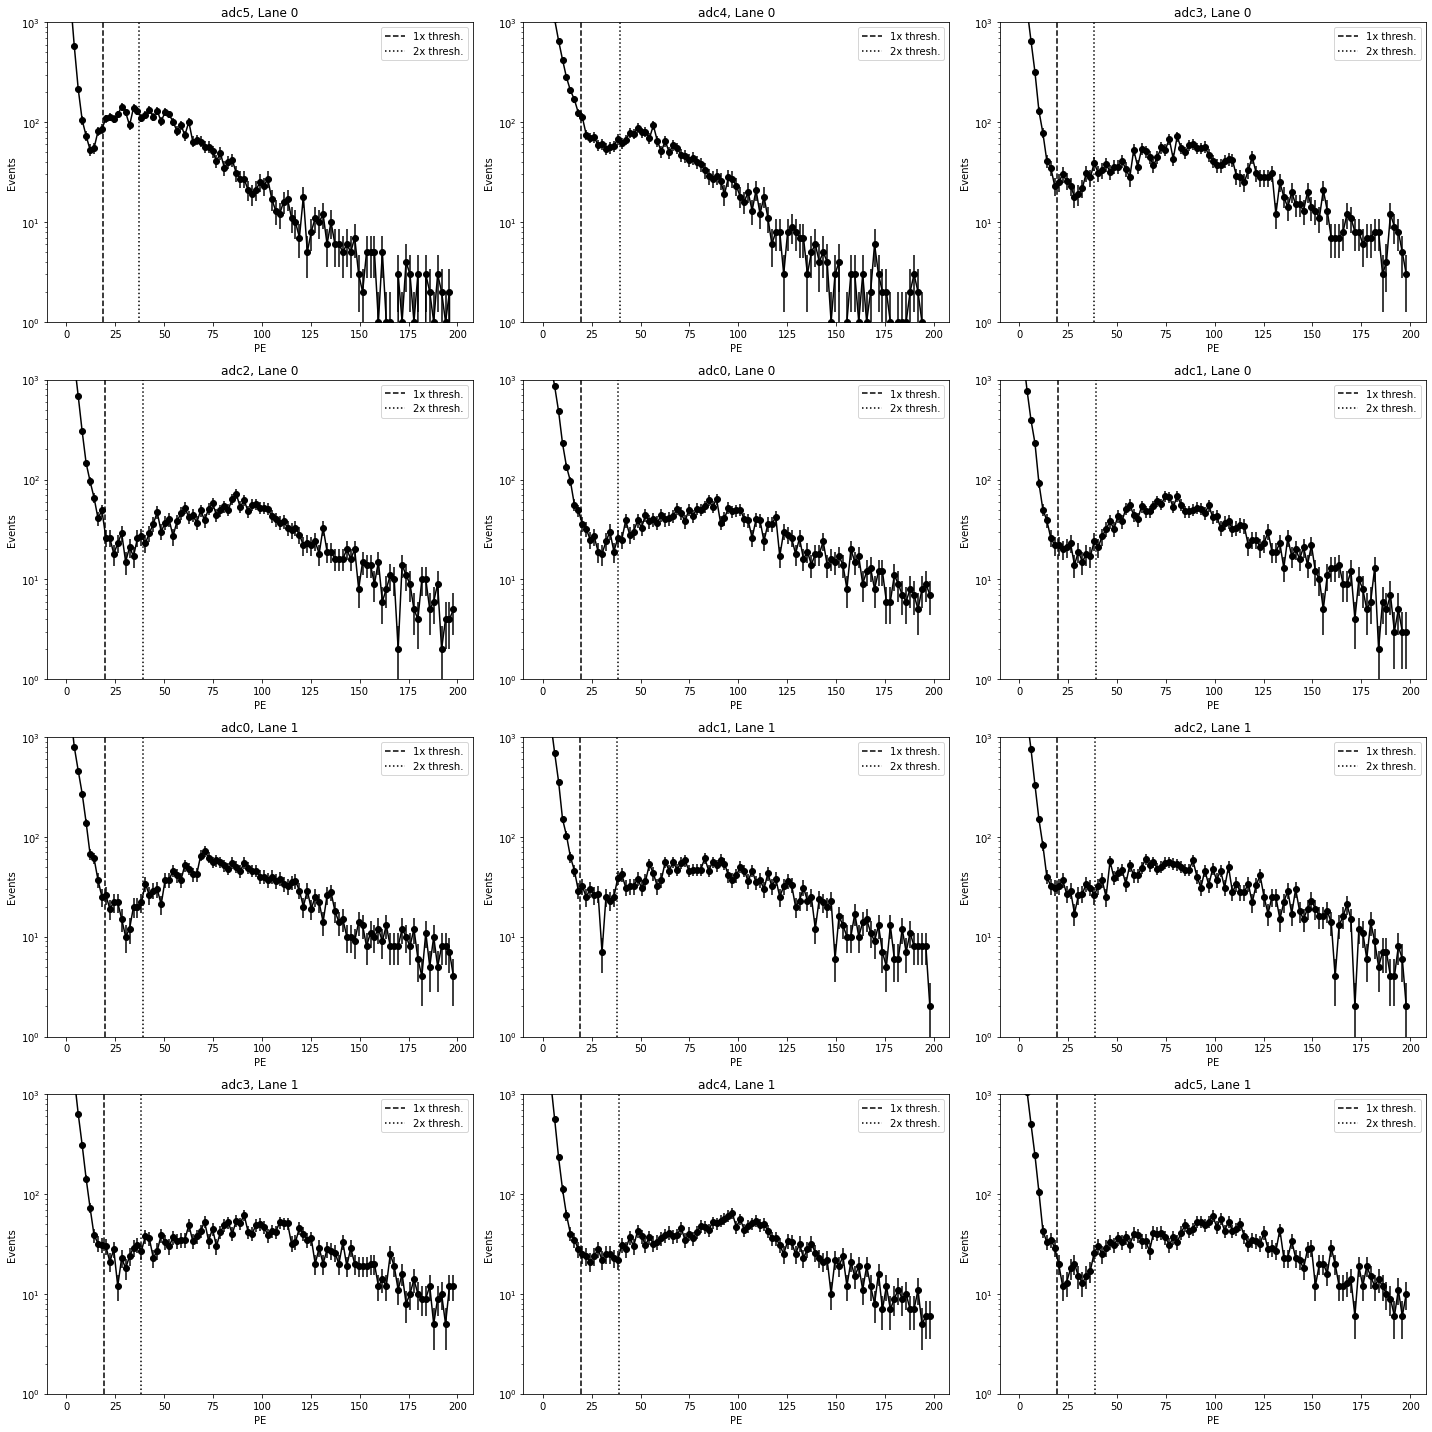

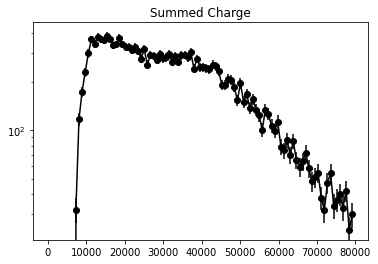

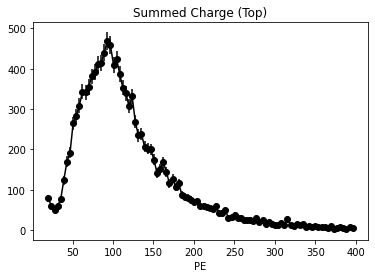

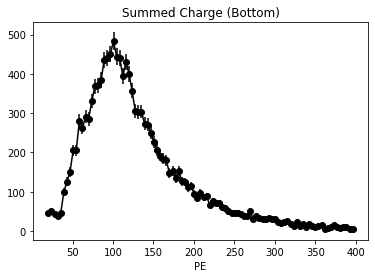

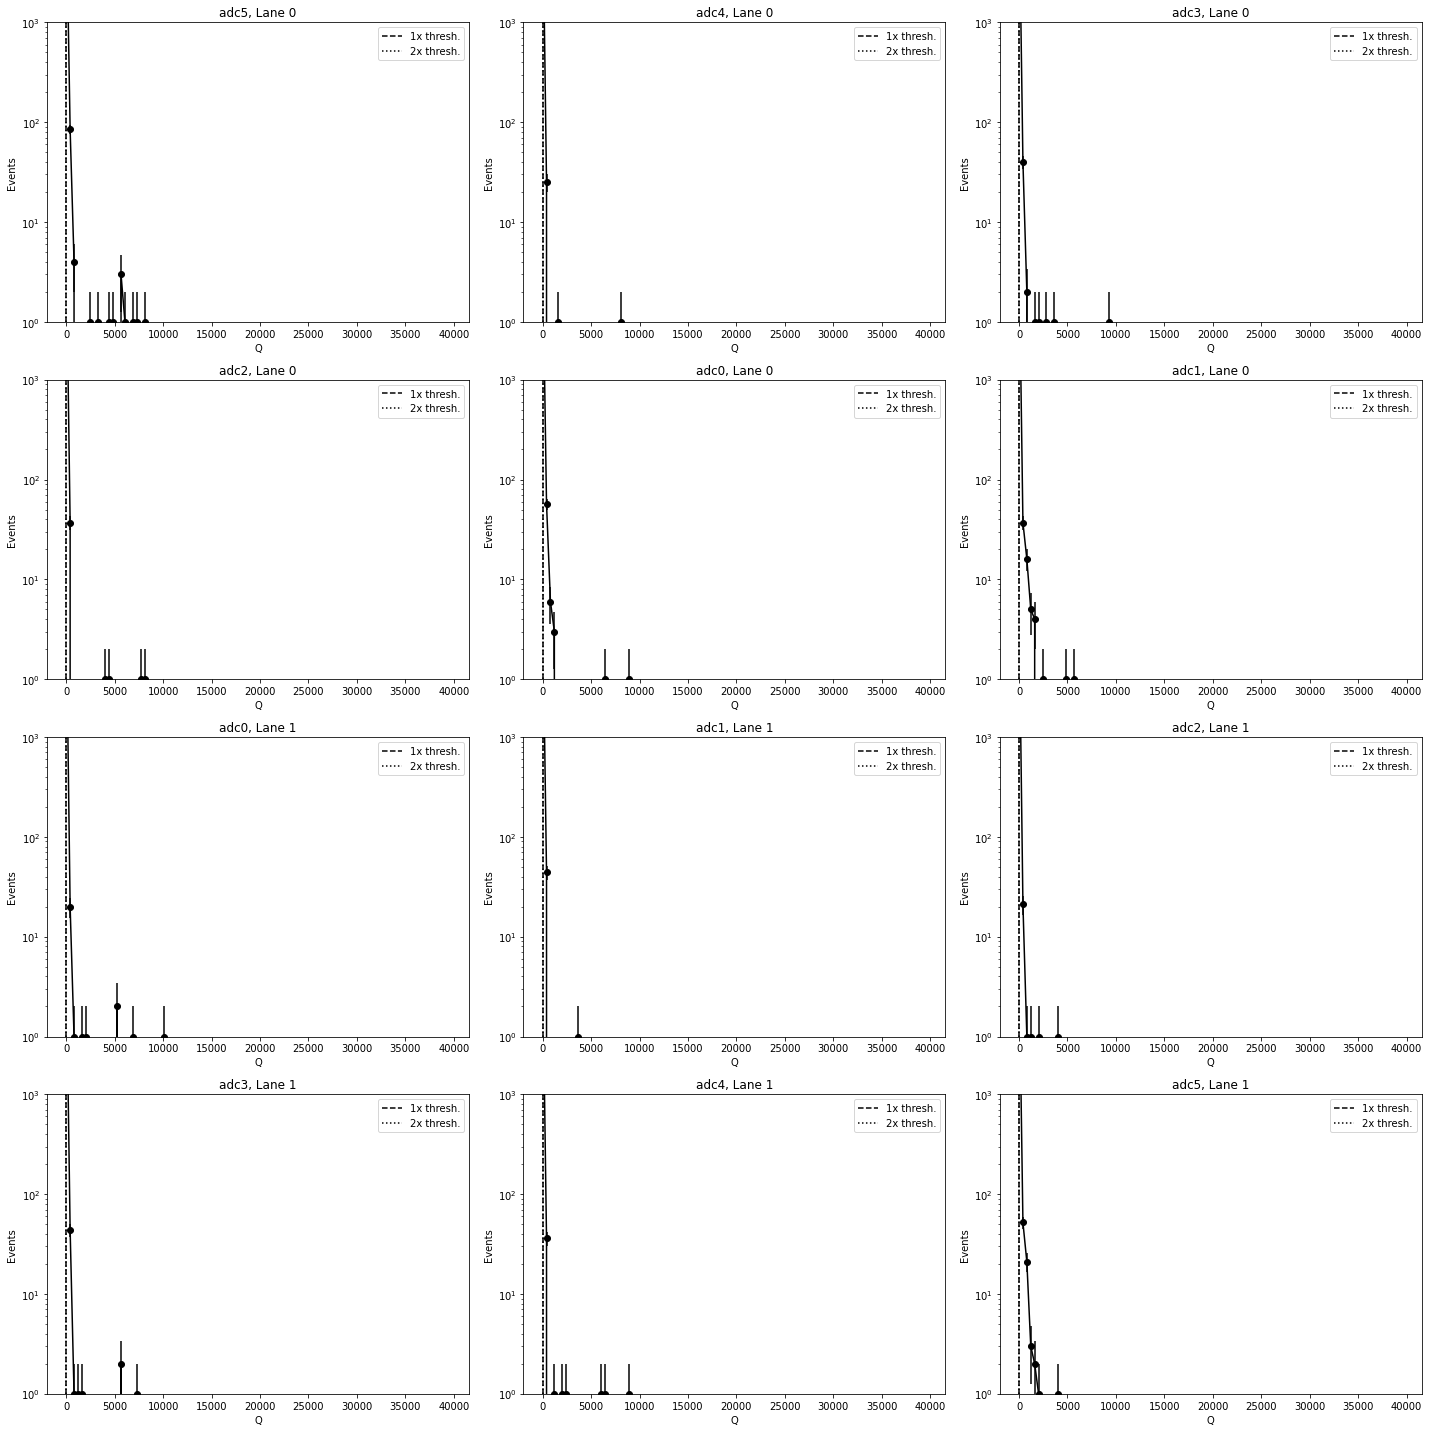

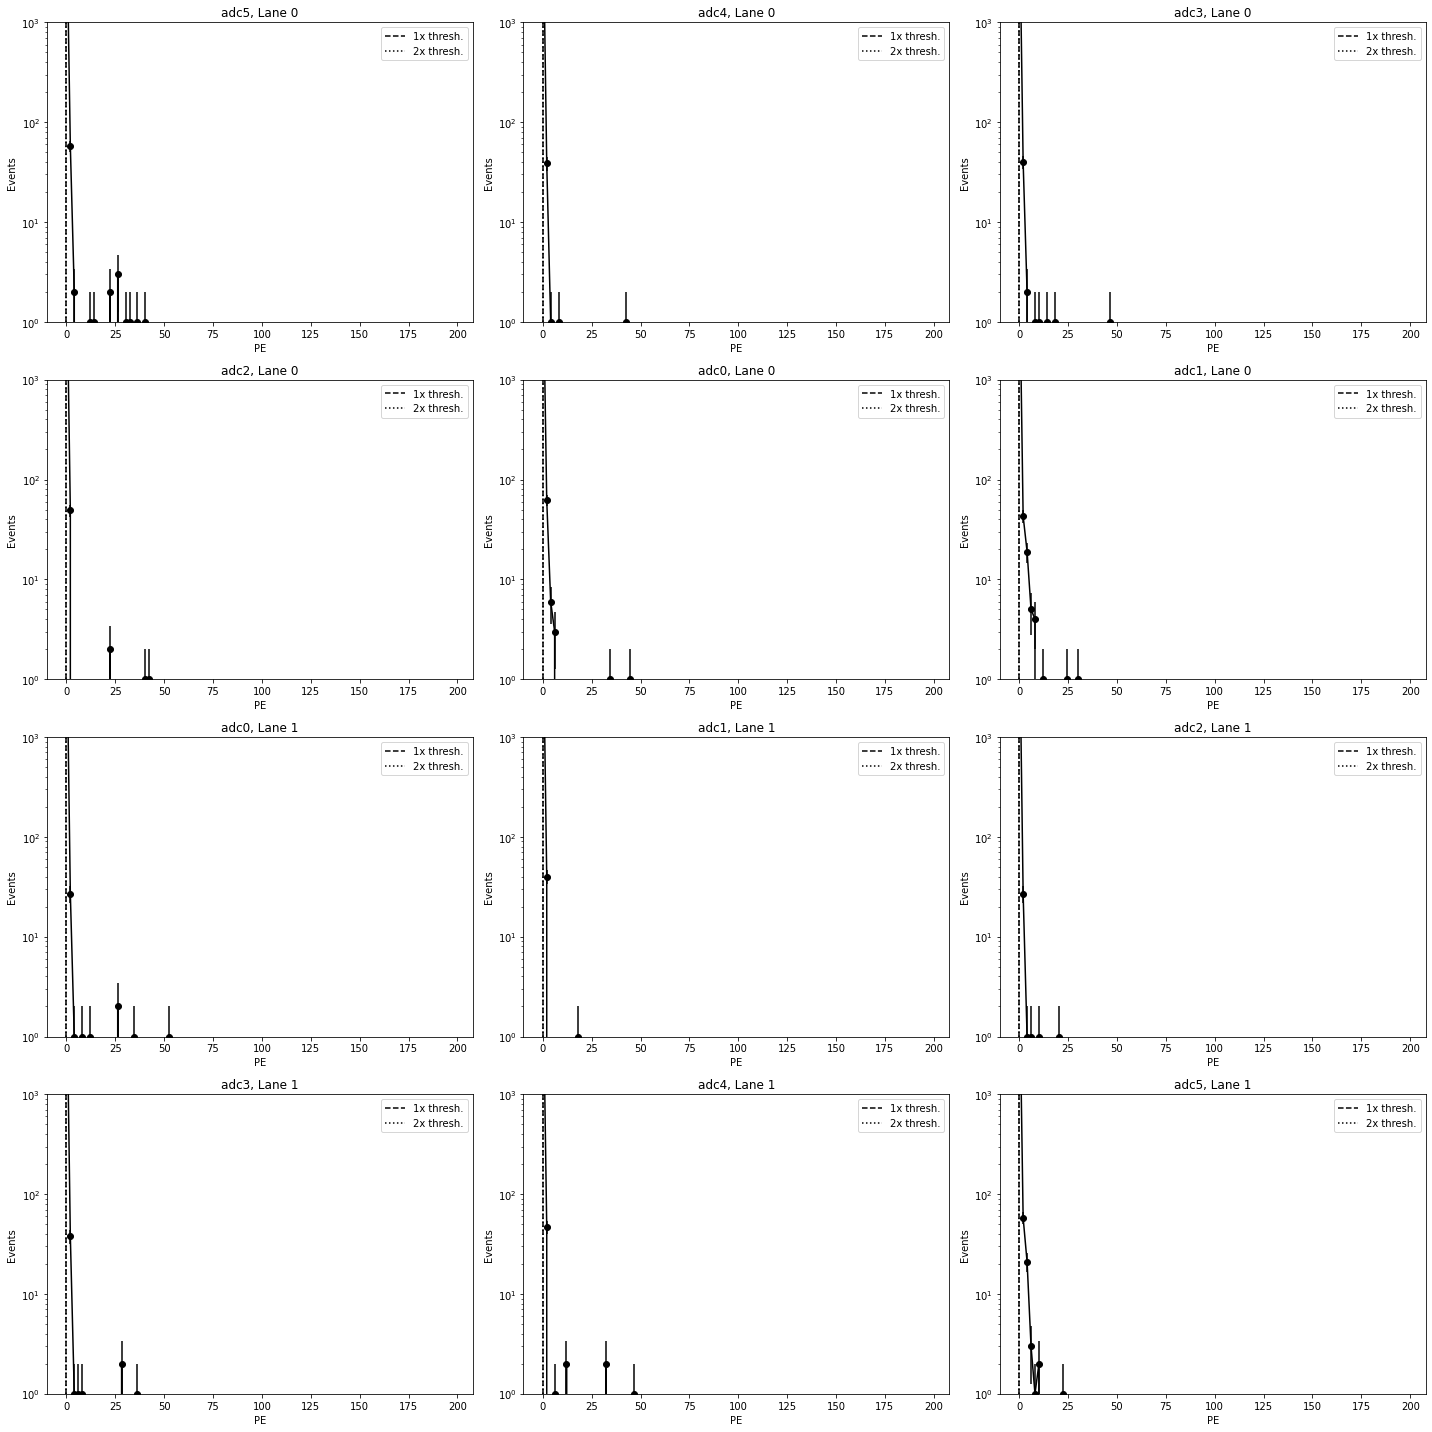

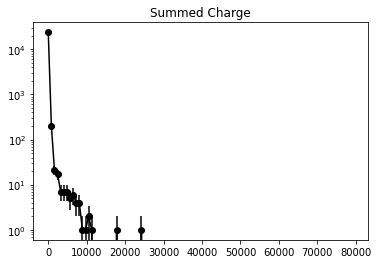

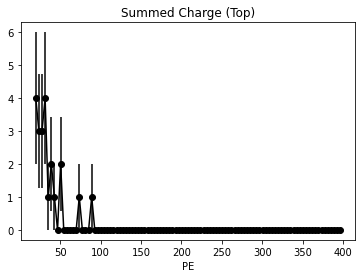

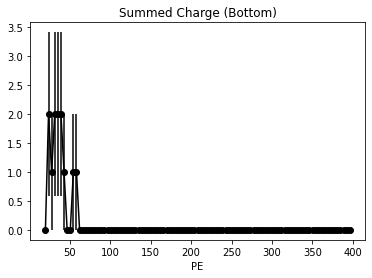

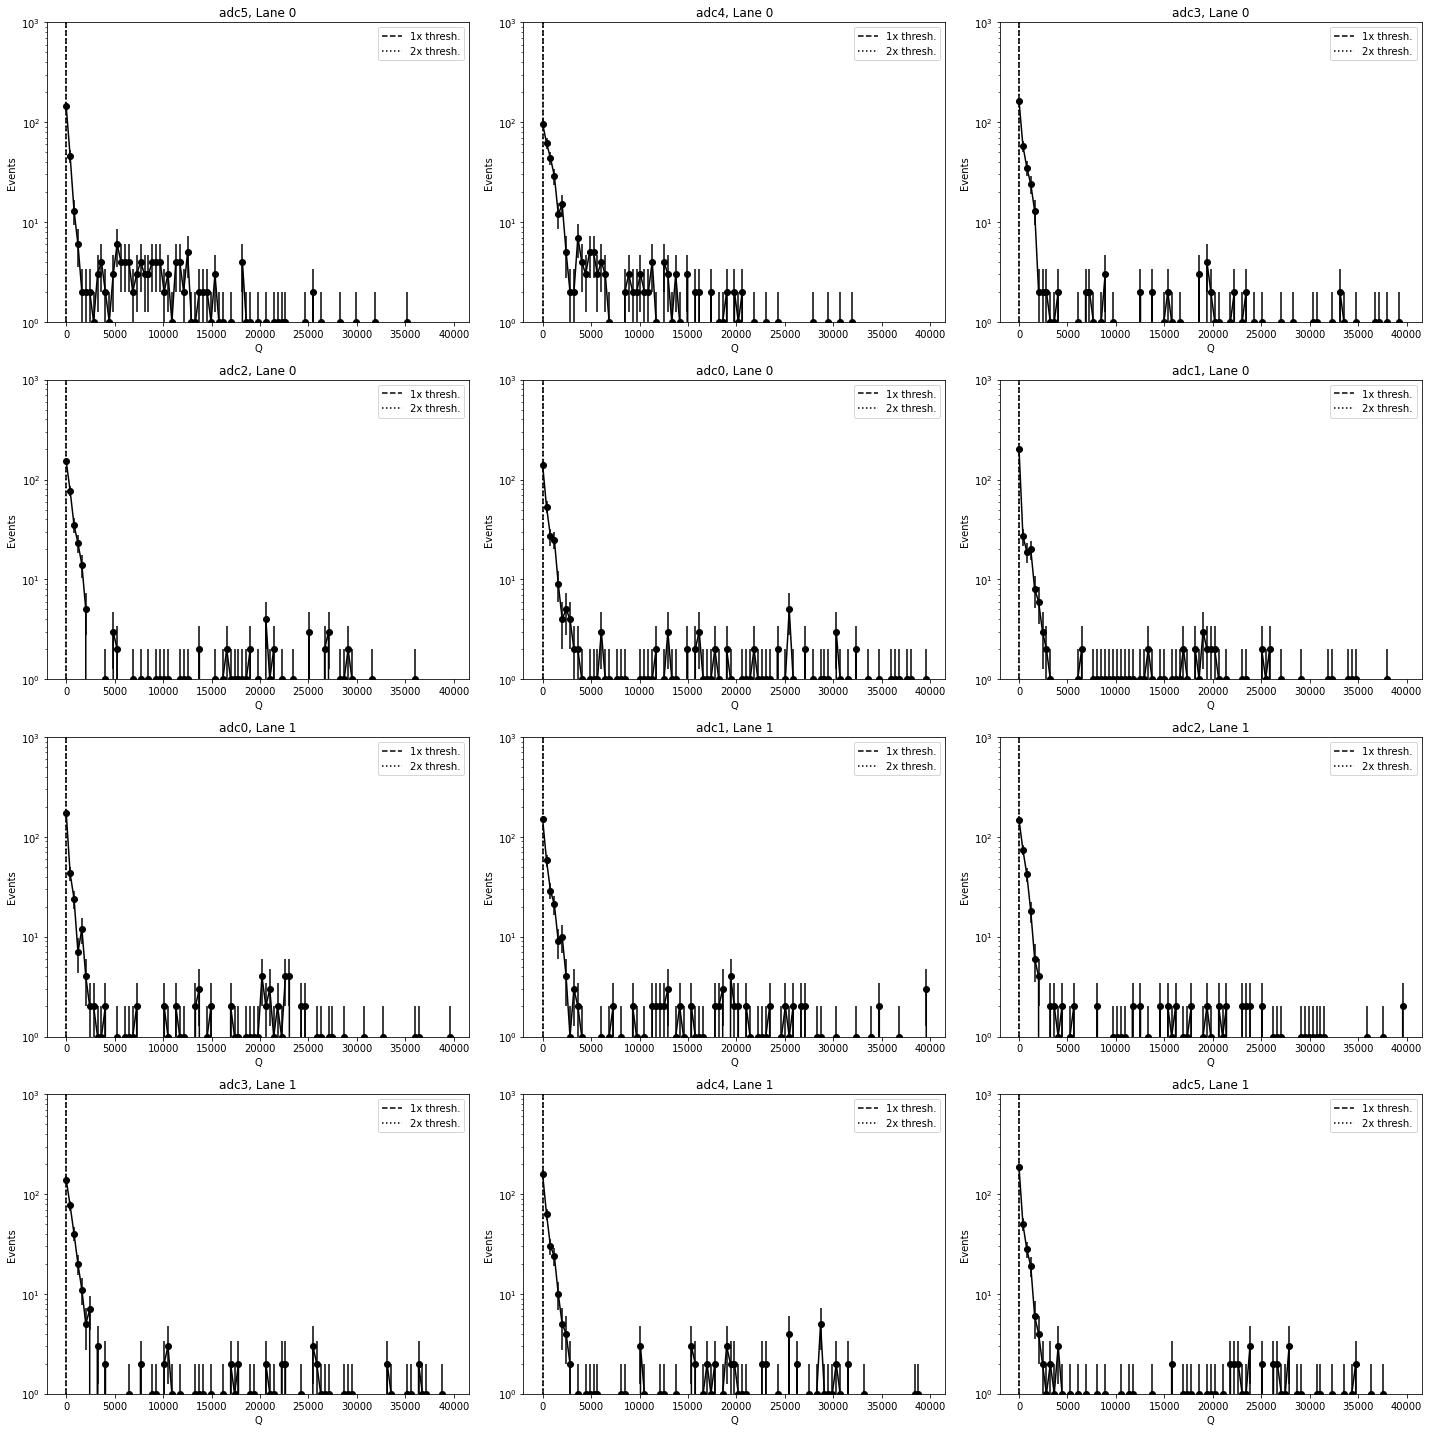

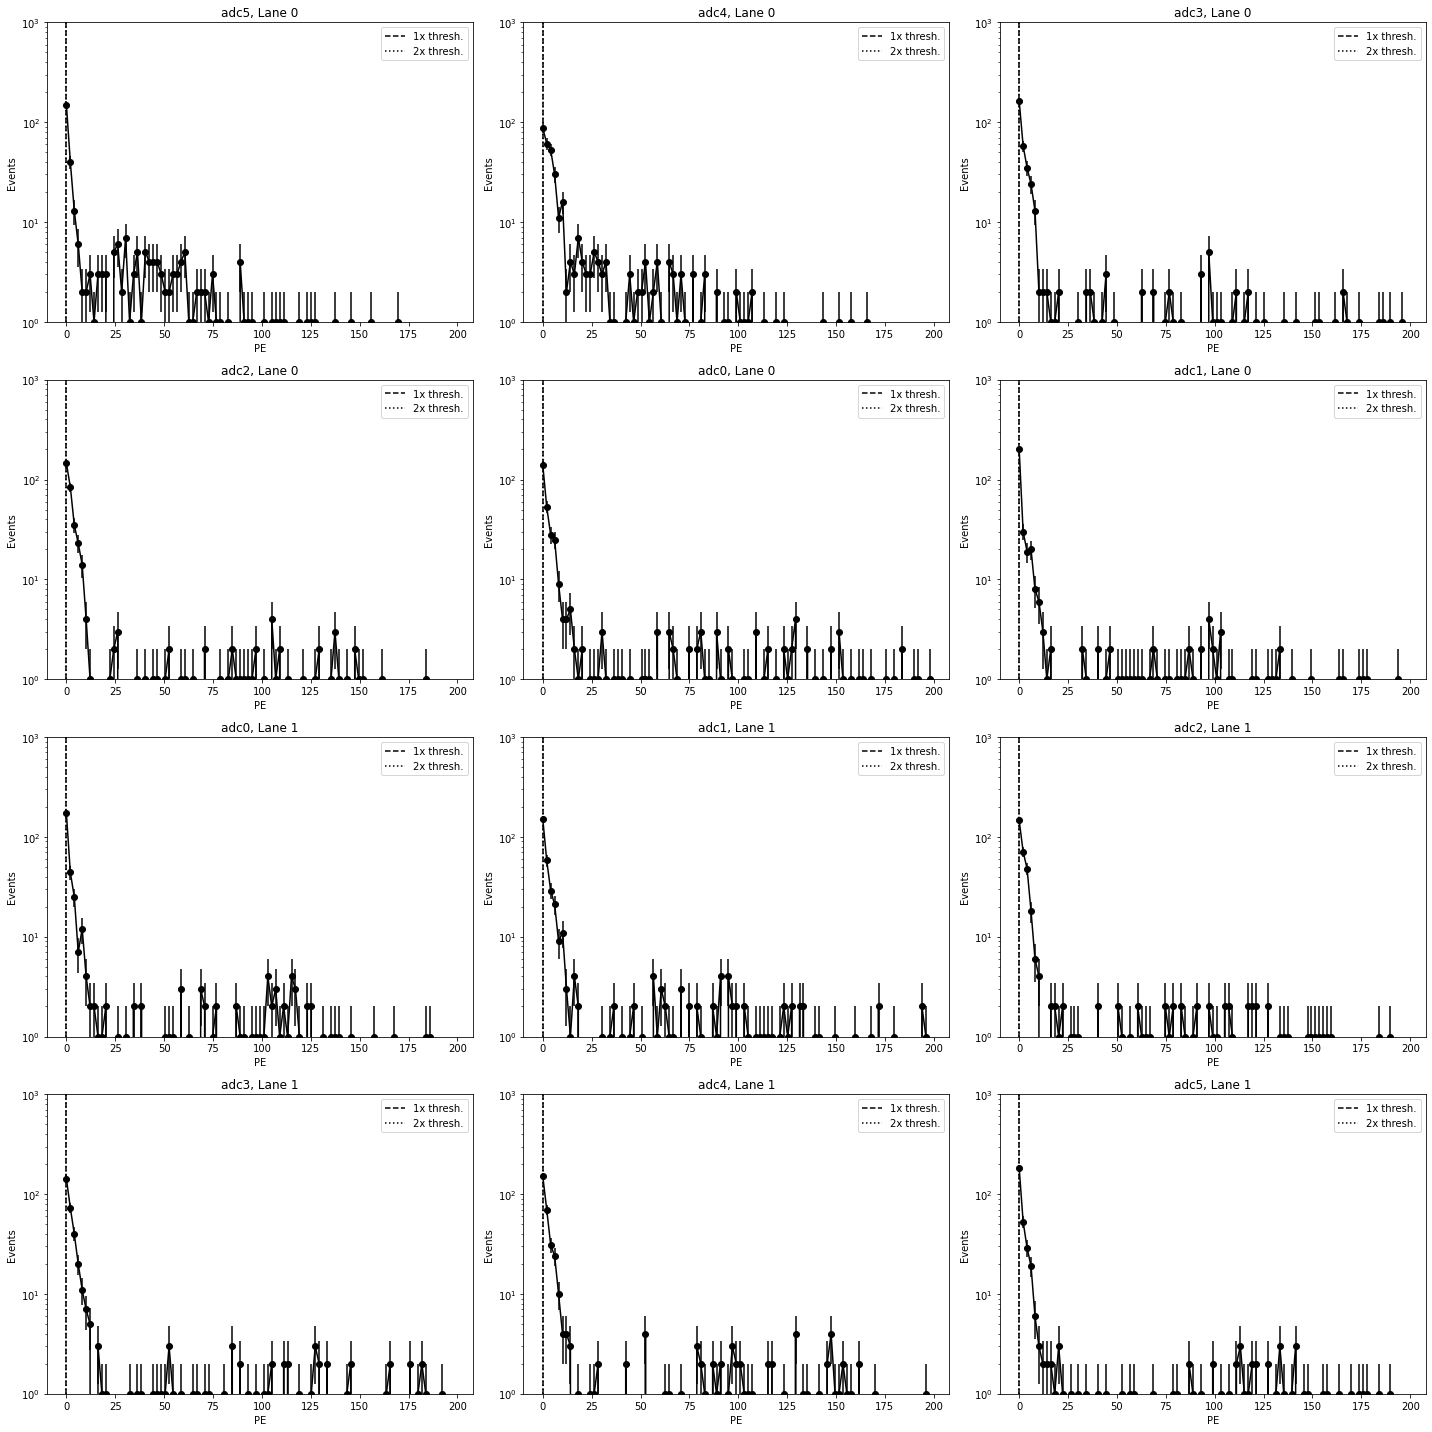

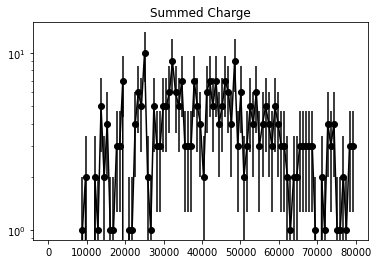

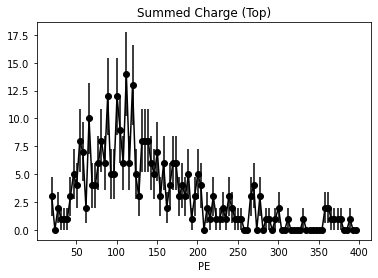

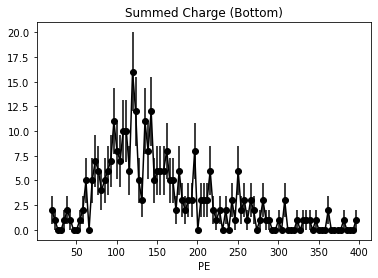

In [8]:

plot_charge_lanes(adc_split_array_threshold, threshold = 24, eight_channel = False, nsamples=64, new_format = True, by_bunch_count=False, landau_fit= False, gain_list=gain_list, pedestal_list=pedestal_list, ror_length=64, calc_pedestal=False, min_samp=25, max_samp=50)
plot_charge_lanes(adc_split_array_cosmics, threshold = 0, eight_channel = False, nsamples=64, new_format = True, by_bunch_count=False, landau_fit= False, gain_list=gain_list, pedestal_list=pedestal_list, ror_length=64, calc_pedestal=False, min_samp=25, max_samp=50)
plot_charge_lanes(adc_split_array_both, threshold = 0, eight_channel = False, nsamples=64, new_format = True, by_bunch_count=False, landau_fit= False, gain_list=gain_list, pedestal_list=pedestal_list, ror_length=64, calc_pedestal=False, min_samp=25, max_samp=50)


In [ ]:
#adc_split_array_threshold, adc_split_array_cosmics, adc_split_array_both

channel_correlations(adc_split_array_threshold, df_full_conns_external_trigger_test, eight_channel = False, use_sum = True, nsamples = 64, by_bunch_count = False, new_format = True, ror_length = 64, gain_list = gain_list, pedestal_list = pedestal_list, min_samp = 30, max_samp = 50, calc_pedestal=True)
channel_correlations(adc_split_array_cosmics, df_full_conns_external_trigger_test, eight_channel = False, use_sum = True, nsamples = 64, by_bunch_count = False, new_format = True, ror_length = 64, gain_list = gain_list, pedestal_list = pedestal_list, min_samp = 30, max_samp = 50, calc_pedestal=True)
channel_correlations(adc_split_array_both, df_full_conns_external_trigger_test, eight_channel = False, use_sum = True, nsamples = 64, by_bunch_count = False, new_format = True, ror_length = 64, gain_list = gain_list, pedestal_list = pedestal_list, min_samp = 30, max_samp = 50, calc_pedestal=True)


0 10
0 10
1.0
0 10
1 8
0.4891876151455613
0 10
2 6
-0.03831621930250199
0 10
3 4
-0.09446892372697864
0 10
4 2
-0.11985316392572815
0 10
5 0
-0.13155456378779243
0 10
6 11
0.17946859068433785
0 10
7 9
0.19922809169743727
0 10
8 7
0.009655650476654993
0 10
9 5
-0.07717294570127532
0 10
10 3
-0.11774190837062609
0 10
11 1
-0.1358371498246786
1 8
0 10
0.4891876151455613
1 8
1 8
1.0000000000000002
1 8
2 6
0.164809987520298
1 8
3 4
0.01480311582160953
1 8
4 2
-0.05505030592515842
1 8
5 0
-0.09698250588011548
1 8
6 11
0.0699034373691015
1 8
7 9
0.15019994351210428
1 8
8 7
0.08728000346643579
1 8
9 5
-0.007550225993538188
1 8
10 3
-0.07649914766463473
1 8
11 1
-0.11220504523848543
2 6
0 10
-0.03831621930250199
2 6
1 8
0.164809987520298
2 6
2 6
1.0
2 6
3 4
0.08285428630243921
2 6
4 2
-0.05680727817866951
2 6
5 0
-0.09935943535183138
2 6
6 11
-0.06574323446612909
2 6
7 9
0.02196609473401678
2 6
8 7
0.1439425225493412
2 6
9 5
0.09618156858085407
2 6
10 3
-0.03503367063705885
2 6
11 1
-0.09933676

Text(0, 0.5, 'barID')

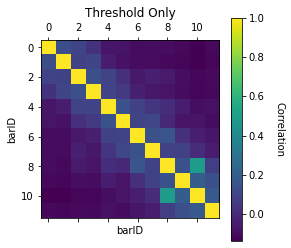

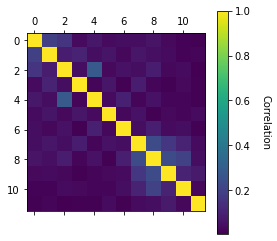

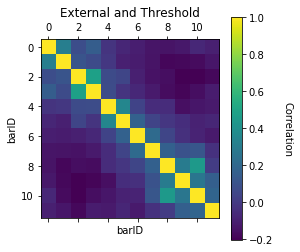

In [ ]:
channel_covariances(adc_split_array_threshold, df_full_conns_external_trigger_test, eight_channel = False, conv_bar_id=True, use_sum = True, nsamples = 64, by_bunch_count = False, new_format = True, ror_length = 64, gain_list = gain_list, pedestal_list = pedestal_list, min_samp = 0, max_samp = None)
plt.title("Threshold Only")
plt.xlabel("barID")
plt.ylabel("barID")

channel_covariances(adc_split_array_cosmics, df_full_conns_external_trigger_test, eight_channel = False, conv_bar_id=True, use_sum = True, nsamples = 64, by_bunch_count = False, new_format = True, ror_length = 64, gain_list = gain_list, pedestal_list = pedestal_list, min_samp = 0, max_samp = None)
channel_covariances(adc_split_array_both, df_full_conns_external_trigger_test, eight_channel = False, conv_bar_id=True, use_sum = True, nsamples = 64, by_bunch_count = False, new_format = True, ror_length = 64, gain_list = gain_list, pedestal_list = pedestal_list, min_samp = 0, max_samp = None)
plt.title("External and Threshold")
plt.xlabel("barID")
plt.ylabel("barID")


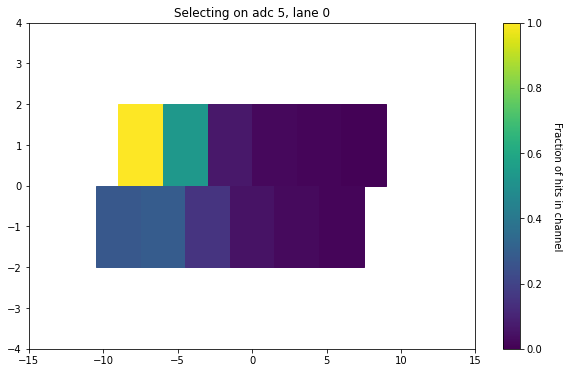

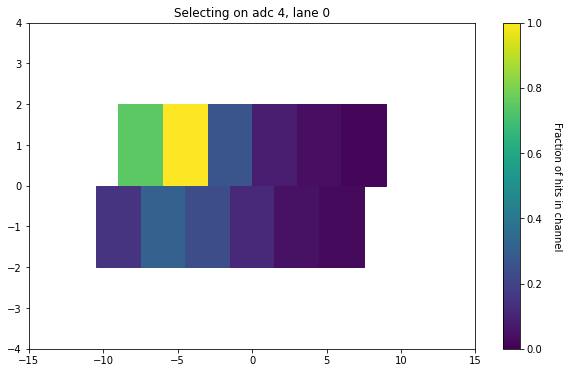

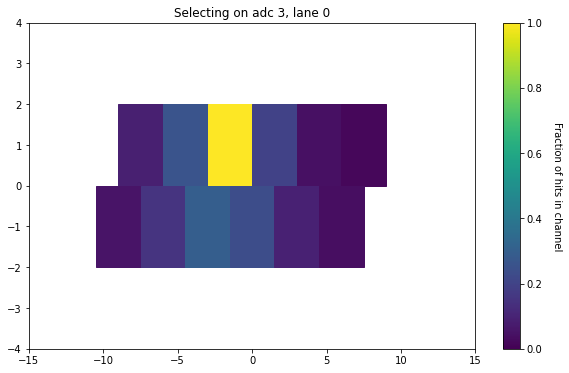

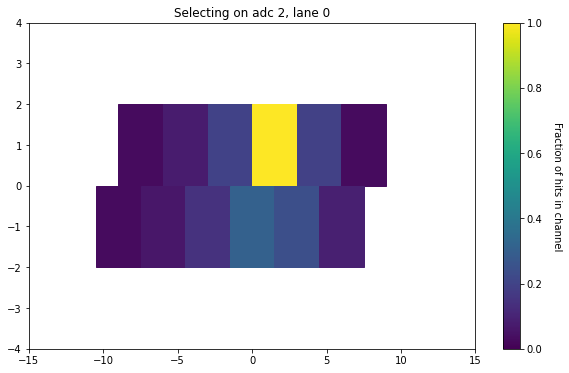

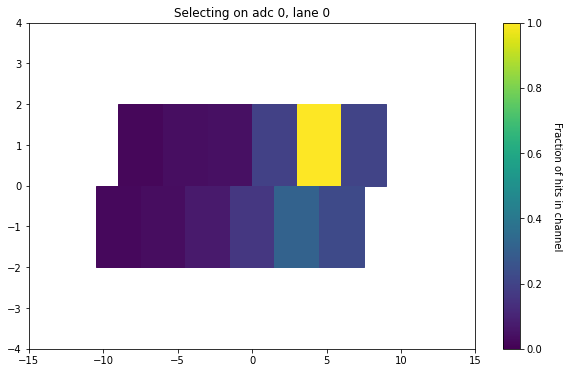

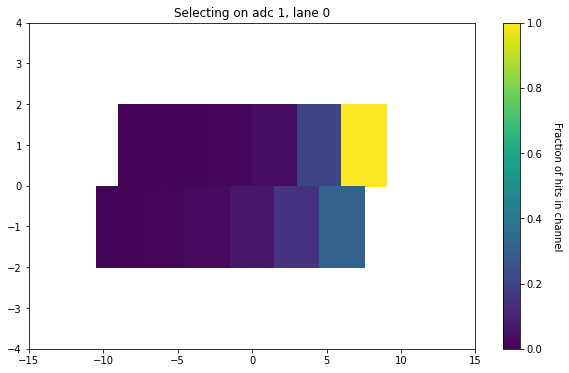

In [ ]:
plot_hits_over_threshold_corr(adc_split_array_threshold, 30, eight_channel = False, nsamples=64)

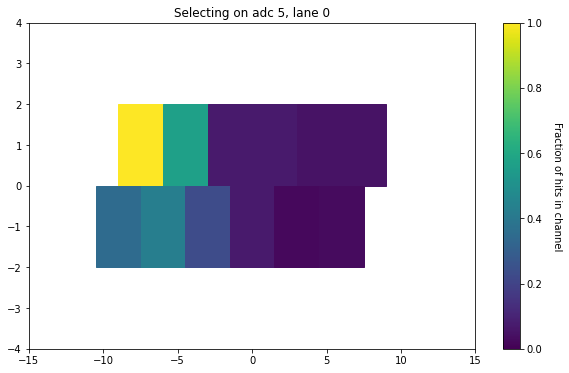

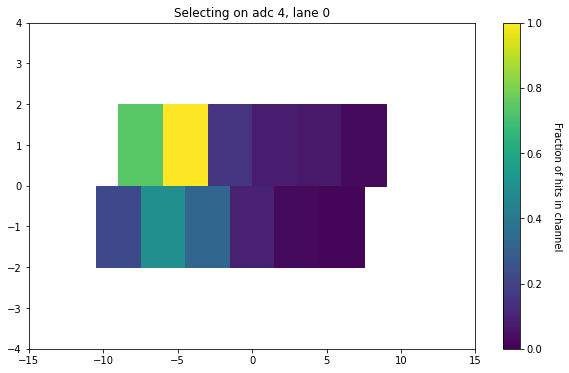

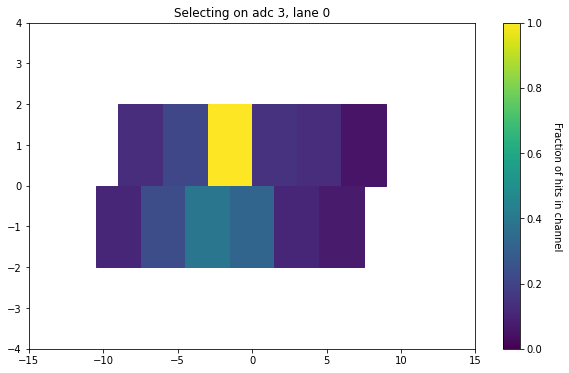

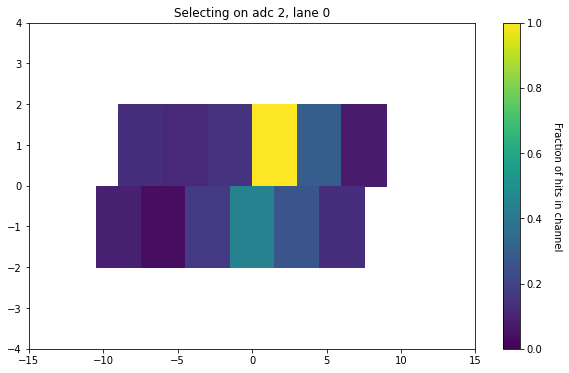

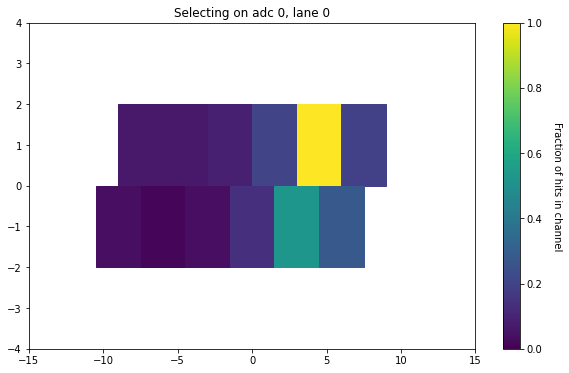

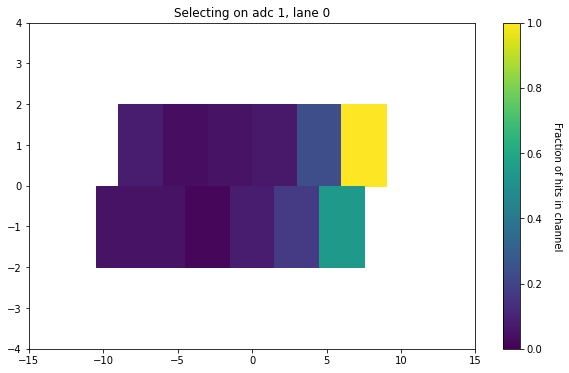

In [ ]:
plot_hits_over_threshold_corr(adc_split_array_both, 40, eight_channel = False, nsamples=64)

In [ ]:
cluster_energies, cluster_energies_top, cluster_energies_bottom, n_hits, clusters, pe_values = get_clusters_optimize(adc_split_array_threshold, gain_list, pedestal_list, seed_threshold = 25, cluster_threshold = 10, fiducial = False, eight_channel = False, nsamples = 64, new_format = False, by_bunch_count = False, ror_length = 64, min_samp = 0, max_samp = None)
cluster_energies_external, cluster_energies_top_external, cluster_energies_bottom_external, n_hits_external, clusters_external, pe_values_external = get_clusters_optimize(adc_split_array_both, gain_list, pedestal_list, seed_threshold = 25, cluster_threshold = 10, fiducial = False, eight_channel = False, nsamples = 64, new_format = False, by_bunch_count = False, ror_length = 64, min_samp = 0, max_samp = None)


[[[11]],
 [[8]],
 [[0]],
 [[9, 10, 11]],
 [[9]],
 [[5, 7]],
 [[5]],
 [[4, 6]],
 [[5]],
 [[7]],
 ...,
 [[3, 4, 5, 6, 7, 8]],
 [[1, 3, 4]],
 [[3, 5, 6]],
 [[8]],
 [[8]],
 [[8]],
 [[7, 9]],
 [[3], [7, 9]],
 [[6, 8, 9, 11]]]
[[[1, 2, 3]],
 [[1]],
 [[8, 9, 10, 11]],
 [[0, 1, 2, 3]],
 [[0]],
 [[1, 2, 3, 5]],
 [[1, 3]],
 [[9, 10]],
 [[7]],
 [[6, 8, 9, 10, 11]],
 ...,
 [[3, 5, 7, 8]],
 [[0, 1], [4], [7, 9, 10]],
 [[10, 11]],
 [[2], [5]],
 [[1], [11]],
 [[10, 11]],
 [[10, 11]],
 [[1, 2]],
 [[3, 5, 6, 7]]]


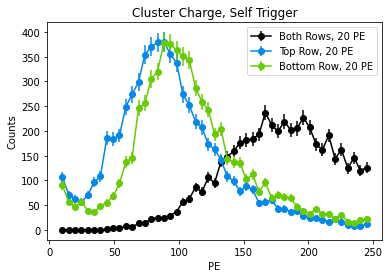

In [ ]:
n, bins = np.histogram(ak.flatten(cluster_energies), bins = np.linspace(10,250,50))
plt.errorbar(bins[:-1], n, yerr = np.sqrt(n) ,fmt = 'o-', color = 'k', label = "Both Rows, 20 PE")
n, bins = np.histogram(ak.flatten(cluster_energies_top), bins = np.linspace(10,250,50))
plt.errorbar(bins[:-1], n, yerr = np.sqrt(n) ,fmt = 'o-', color = colors[0], label = "Top Row, 20 PE")
n, bins = np.histogram(ak.flatten(cluster_energies_bottom), bins = np.linspace(10,250,50))
plt.errorbar(bins[:-1], n, yerr = np.sqrt(n) ,fmt = 'o-', color = colors[1], label = "Bottom Row, 20 PE")
plt.xlabel('PE')
plt.title('Cluster Charge, Self Trigger')
plt.ylabel("Counts")
plt.legend()

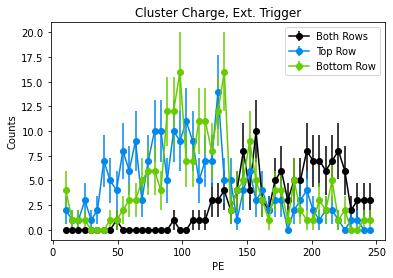

In [ ]:
n, bins = np.histogram(ak.flatten(cluster_energies_external), bins = np.linspace(10,250,50))
plt.errorbar(bins[:-1], n, yerr = np.sqrt(n) ,fmt = 'o-', color = 'k', label = "Both Rows")
n, bins = np.histogram(ak.flatten(cluster_energies_top_external), bins = np.linspace(10,250,50))
plt.errorbar(bins[:-1], n, yerr = np.sqrt(n) ,fmt = 'o-', color = colors[0], label = "Top Row")
n, bins = np.histogram(ak.flatten(cluster_energies_bottom_external), bins = np.linspace(10,250,50))
plt.errorbar(bins[:-1], n, yerr = np.sqrt(n) ,fmt = 'o-', color = colors[1], label = "Bottom Row")
plt.xlabel('PE')
plt.title('Cluster Charge, Ext. Trigger')
plt.ylabel("Counts")
plt.legend()